**Before Starting**: First, fill out the below code cell with your first name, last name, and student ID.

**Before Submission**: Make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).


**<font color='red'>WARNING: Some TODOs have `todo_check()` functions which will give you a rough estimate of whether you will recieve points or not. <u>These checks are there simply to make sure you are on the right track and they DO NOT determine your final grade for the lab</u>. They are only here to provide you with real-time feedback.</font>**

In [3]:
FIRST_NAME = "Rucha"
LAST_NAME = "Tatawar"
STUDENT_ID = "801420899"

---



# Data Visualization & Preprocessing Lab

### ITCS 5156:  Applied Machine Learning


In [4]:
# Extra imports for this lab that are beyond the scope of discussion
import os
import gc
import traceback
import warnings
from pdb import set_trace

# Set this to True if you DO NOT want to run the
# garbage_collect() functions throughout the notebook
turn_off_garbage_collect = False

def garbage_collect(vars_):
    if not turn_off_garbage_collect:
        for v in vars_:
            if v in globals():
                del globals()[v]
        collected = gc.collect()


class TodoCheckFailed(Exception):
    pass

def todo_check(asserts):
    failed_err = "You passed {}/{} and FAILED the following code checks:\n{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(asserts):
        exc_failed = False
        if isinstance(condi, str):
            try:
                passed = eval(condi)
            except Exception:
                exc_failed = True
                n_failed += 1
                failed += f"\nCheck [{check+1}]: Failed to execute check [{check+1}] due to the following error...\n{traceback.format_exc()}"
        elif isinstance(condi, bool):
            passed = condi
        else:
            raise ValueError("asserts must be a list of strings or bools")

        if not exc_failed and not passed:
            n_failed += 1
            failed += f"\nCheck [{check+1}]: Failed\n\tTip: {err}\n"

    if len(failed) != 0:
        passed = len(asserts) - n_failed
        err = failed_err.format(passed, len(asserts), failed)
        raise TodoCheckFailed(err.format(failed))
    print("Your code PASSED the code check!")

# Goal
The goal of this activity is to introduce and practice using popular data science libraries by doing some very basic data visualization and preprocessing. You'll want to fill in any code that is specified by the `TODO` comments and Markdown cells. It should be noted, that all the correct outputs are given below each code cell. It might be useful to duplicate all the `TODO` cells so you can try to match the correct output with your own code!

In this lab, you will go step-by-step procedure to play with data. The exercise is composed of

- Quick overview of Jupyter Notebook
- Practice how to deal with data **without** using ML tools such as
  - Navigate and download data in UCI Repository
  - Load data via Numpy and Pandas
  - Generate plots to visualize data via Matplotlib and Pandas
  - Learn how to Streamlit data
  - Practice data preprocessing (cleaning/reduction/transformation)
  

# Tables of TODO's  
  
### To get complete credit for the lab, you need to finish all the TODO's. Make sure to finish the all in here:
1. [TODO1](#TODO1) (5 points)
1. [TODO2](#TODO2) (5 points)
1. [TODO3](#TODO3) (5 points)
1. [TODO4](#TODO4) (5 points)
1. [TODO5](#TODO5) (5 points)
1. [TODO6](#TODO6) (5 points)
1. [TODO7](#TODO7) (5 points)
1. [TODO8](#TODO8) (5 points)
1. [TODO9](#TODO9) (5 points)
1. [TODO10](#TODO10) (5 point)
1. [TODO11](#TODO11) (5 points)
1. [TODO12](#TODO12) (13 points)
1. [TODO13](#TODO13) (5 points)
1. [TODO14](#TODO14) (5 points)
1. [TODO15](#TODO15) (10 points)
1. [TODO16](#TODO16) (5 points)
1. [TODO17](#TODO17) (5 points)
1. [Feedback](#feedback)  (2 points)


# Jupyter Basics

## What is Jupyter Notebook?
Jupyter Notebook is a combination of code and text elements (Markdown, figures, equations, and other media). It is a server-client application which runs via your browser and local-host. Every notebook has a kernel which is your computational engine for running the code (the Python kernel is used by default although other language kernels can be used).

Notebook has become a popular tool for data scientist due to its natural integration with data visualization. In addition, it has become a popular meidum for introducing coding concepts, developing interactive code, live demos, and code sharing in general.

## Useful Jupyter Tricks and Commands
Below are list of commands you might find yourself frequently using. If you are using a Mac simply replace `CTRL` with `CMD`.
- List of keybindings `H`
- Run a cell when selected `CTRL-ENTER`
- Run call and move to next cell `SHIFT-ENTER`
- Insert a new cell `ESC-B`
- Convert cell to Markdown `ESC-M`
- Delete a cell `ESC-D-D`
- Save notebook `CTRL-S`
- Search only over code `ESC-F`
- Show/hide cell output `ESC-O`
- To reset your notebook's environment and memory go to the menu bar at the top and nagviate to `Kernel -> Restart` **(Note: this will not clear cell output)**
    - Other commands can be found under `Kernel` such as `Restart & Clear Output` which will clear all cell output

## References
- [Offical Jupyter documentation](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html)
- [Interesting Jupyter tips and tricks](https://towardsdatascience.com/jupyter-notebook-hints-1f26b08429ad)
- [More tips and tricks](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)
- [Offical documentation on iPython magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

# Preparing Data

Let's visit UCI Data Repository: https://archive.ics.uci.edu/ml/index.php. Here, you can find datasets that you might be interested in, although there are many other data repositories out there as well. In this practice, download the following dataset:
- Productivity Prediction of Garment Employees Data: https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees
    - Download `garments_worker_productivity.csv`

First, we import the libraries we are going to use. For data handling, we can use either Numpy or Pandas. For plotting, we will use Matplotlib - although Pandas can do some plotting as well.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This is a python magic command.
# This command allows the output of matplotlib to be displayed inline, i.e. under the cell.
%matplotlib inline

Once you download the data, you can run the following shell commands to see the content of a file.

A command beginning with % represents a magic command built-in Jupyter Notebook.
If you need further reference for the magic commands, please refer to https://ipython.readthedocs.io/en/stable/interactive/magics.html.

In [7]:
%pfile garments_worker_productivity.csv

Object `garments_worker_productivity.csv` not found.


date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1/1/2015,Quarter1,sweing,Thursday,8,0.8,26.16,1108,7080,98,0,0,0,59,0.940725424
1/1/2015,Quarter1,finishing ,Thursday,1,0.75,3.94,,960,0,0,0,0,8,0.8865
1/1/2015,Quarter1,sweing,Thursday,11,0.8,11.41,968,3660,50,0,0,0,30.5,0.800570492
1/1/2015,Quarter1,sweing,Thursday,12,0.8,11.41,968,3660,50,0,0,0,30.5,0.800570492
1/1/2015,Quarter1,sweing,Thursday,6,0.8,25.9,1170,1920,50,0,0,0,56,0.800381944
1/1/2015,Quarter1,sweing,Thursday,7,0.8,25.9,984,6720,38,0,0,0,56,0.800125
1/1/2015,Quarter1,finishing ,Thursday,2,0.75,3.94,,960,0,0,0,0,8,0.755166667
1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795,6900,45,0,0,0,57.5,0.753683478
1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733,6000,34,0,0,0,55,0.753097531
1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681,6900,45,0,0,0,57.5,0.750427826
1/1/2015,Quarter1,sweing,Thursday,9,0.7,28.08,872,6900

In [8]:
!type garments_worker_productivity.csv

date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1/1/2015,Quarter1,sweing,Thursday,8,0.8,26.16,1108,7080,98,0,0,0,59,0.940725424
1/1/2015,Quarter1,finishing ,Thursday,1,0.75,3.94,,960,0,0,0,0,8,0.8865
1/1/2015,Quarter1,sweing,Thursday,11,0.8,11.41,968,3660,50,0,0,0,30.5,0.800570492
1/1/2015,Quarter1,sweing,Thursday,12,0.8,11.41,968,3660,50,0,0,0,30.5,0.800570492
1/1/2015,Quarter1,sweing,Thursday,6,0.8,25.9,1170,1920,50,0,0,0,56,0.800381944
1/1/2015,Quarter1,sweing,Thursday,7,0.8,25.9,984,6720,38,0,0,0,56,0.800125
1/1/2015,Quarter1,finishing ,Thursday,2,0.75,3.94,,960,0,0,0,0,8,0.755166667
1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795,6900,45,0,0,0,57.5,0.753683478
1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733,6000,34,0,0,0,55,0.753097531
1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681,6900,45,0,0,0,57.5,0.750427826
1/1/2015,Quarter1,sweing,Thursday,9,0.7,28.08,872,6900

You can run shell commands by using the `!` symbol in a code cell. In general, the exclamation symbol `!` in a code cell allows you to run command line arguments based on your host OS.

Often, I check the content of file by using "head" or "tail" command in the shell in Mac.

For Windows users, "powershell" combined with "Get-Content" achieves the same.

In [9]:
# !head -30 garments_worker_productivity.csv    # For Linux or Mac
!powershell Get-Content -Head 30 garments_worker_productivity.csv      # For Windows

date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1/1/2015,Quarter1,sweing,Thursday,8,0.8,26.16,1108,7080,98,0,0,0,59,0.940725424
1/1/2015,Quarter1,finishing ,Thursday,1,0.75,3.94,,960,0,0,0,0,8,0.8865
1/1/2015,Quarter1,sweing,Thursday,11,0.8,11.41,968,3660,50,0,0,0,30.5,0.800570492
1/1/2015,Quarter1,sweing,Thursday,12,0.8,11.41,968,3660,50,0,0,0,30.5,0.800570492
1/1/2015,Quarter1,sweing,Thursday,6,0.8,25.9,1170,1920,50,0,0,0,56,0.800381944
1/1/2015,Quarter1,sweing,Thursday,7,0.8,25.9,984,6720,38,0,0,0,56,0.800125
1/1/2015,Quarter1,finishing ,Thursday,2,0.75,3.94,,960,0,0,0,0,8,0.755166667
1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795,6900,45,0,0,0,57.5,0.753683478
1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733,6000,34,0,0,0,55,0.753097531
1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681,6900,45,0,0,0,57.5,0.750427826
1/1/2015,Quarter1,sweing,Thursday,9,0.7,28.08,872,6900

In [10]:
# !tail -30 garments_worker_productivity.csv      # For Linux and Mac
!powershell Get-Content -Tail 30 garments_worker_productivity.csv      # For Windows

3/10/2015,Quarter2,sweing,Tuesday,2,0.7,16.1,957,5400,40,0,0,1,45,0.700051852
3/10/2015,Quarter2,sweing,Tuesday,5,0.65,26.82,1001,7080,26,0,0,1,59,0.650044068
3/10/2015,Quarter2,sweing,Tuesday,7,0.6,30.48,1017,6840,25,0,0,1,57,0.630402924
3/10/2015,Quarter2,finishing,Tuesday,8,0.65,3.9,,960,0,0,0,0,8,0.560625
3/10/2015,Quarter2,finishing,Tuesday,7,0.5,3.9,,960,0,0,0,0,8,0.560625
3/10/2015,Quarter2,finishing,Tuesday,10,0.7,2.9,,960,0,0,0,0,8,0.39875
3/11/2015,Quarter2,finishing,Wednesday,12,0.8,4.6,,2160,0,0,0,0,9,0.922839506
3/11/2015,Quarter2,finishing,Wednesday,11,0.8,2.9,,2400,0,0,0,0,10,0.874027778
3/11/2015,Quarter2,finishing,Wednesday,2,0.75,3.9,,1920,0,0,0,0,8,0.819270833
3/11/2015,Quarter2,finishing,Wednesday,4,0.75,3.94,,1920,0,0,0,0,8,0.813309028
3/11/2015,Quarter2,finishing,Wednesday,1,0.75,3.94,,1920,0,0,0,0,8,0.812625
3/11/2015,Quarter2,sweing,Wednesday,12,0.8,15.26,470,4080,63,0,0,0,34,0.800401961
3/11/2015,Quarter2,sweing,Wednesday,3,0.8,30.1,735,6960,63,0,0,1,58,0.80007

# Read data with Numpy

## What is Numpy?

Numpy is a scientific library that is frequently used for its  highly optimized linear algebra powers. One of Numpy's main attractions is its N-dimensional array objects which work great for multi-dimensional datasets!

We first read the garment worker productivity data with Numpy's `loadtxt()` function. Try running the following code, but don't worry if it throws an error! Be sure to read the error and try to understand what's going wrong.

**Note: Make sure the "garments_worker_productivity.csv" is in the same directory as this notebook! Otherwise, you must edit the below "garments_worker_productivity.csv" string with a path to where the data is stored!**

In [13]:
# This line checks to make sure the garments_worker_productivity.csv is in the
# same directory as this notebook, if not it will throw a warning.
import os 
if not os.path.exists("garments_worker_productivity.csv"):
    warning.warn(f"The garments_worker_productivity.csv is not detected in your local path! " \
                f"You need to move the 'garments_worker_productivity.csv' file to the same " \
                f"location/directory as this notebook which is {os.getcwd()}")
                

In [15]:
# Instead of having the error thrown directly, we will catch it and
# print it out using the traceback library.
import traceback

try:
    data = np.loadtxt("garments_worker_productivity.csv")
except ValueError:
    traceback.print_exc()

ValueError: could not convert string to float: 'date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\Rucha\AppData\Local\Temp\ipykernel_7000\2153332313.py", line 6, in <module>
    data = np.loadtxt("garments_worker_productivity.csv")
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rucha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_npyio_impl.py", line 1397, in loadtxt
    arr = _read(fname, dtype=dtype, comment=comment, delimiter=delimiter,
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rucha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site

### How to decipher error messages?

Well, we start from the actual error message. What does it say?
Most of time, you will be able to get what it means.
Afterwards, if you see the function call stack, which is presented above the error message at the bottom, you can see where in the codes it had an error. You don't need to blame anything in the library, so take a look at the part of YOUR codes that has the error (with an error on the left).


<div id='TODO1'></div>

### TODO1 (5 points)

`TODO`  <ins>Run the cell above and copy the error message (only) to this cell and explain what you think the error is for.</ins>

`ANSWER`

Error message:
ValueError: could not convert string to float

Explanation: The error states that we were unable to convert string datatype to float for the data in question.

As we observed in the error above, we need to convert strings to digits. Firstly, this is because Numpy arrays typically don't like storing strings. Secondly, later we will be plotting and preforming numerical computations which will fail if our array contains a string. The following codes provide the converters which use a combination of Python dictionaries and functions to map a string to an integer (Note: The 2 and 3 passed in the converter correspond to the columns in data that contain strings and need to be converted). Lastly, the `np.loadtxt()` stores the data into `dat` a Numpy array.  

If you want to know more about the `np.loadtxt()` function check out the documentation [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html).

**Note: The `np.loadtxt` parameters require bytestrings (i.e., unicode), hence we need to add `b` before every string in the `quarterdic`, `daydic`, and `deptdic`. Since the column `dates` has a large number of strings, we use inbuilt functions for code readability and store the obtained bytestrings in `datedic_bytes`**

In [21]:
import pandas as pd

# Python dictionaries that map the expected strings contained withing the data to our specified output
quarterdic = {b'Quarter1': 1, b'Quarter2':2, b'Quarter3':3, b'Quarter4':4, b'Quarter5':5}
daydic = {b'Sunday': 1, b'Monday':2, b'Tuesday':3, b'Wednesday':4, b'Thursday':5, b'Friday':6, b'Saturday':7 }
deptdic = {b'sweing': 1, b'finishing ':2, b'finishing':3}
dates_list = pd.read_csv('garments_worker_productivity.csv')["date"].unique()
datedic = {bytes(dates_list[i], 'utf-8'):i+1 for i in range(len(dates_list))}

def quarter_conv(s):
    """ Simple python function that returns the value from the quarterdic given a key. """
    return quarterdic[s]

def day_conv(s):
    """ Simple python function that returns the value from the daydic given a key. """
    return daydic[s]

def dept_conv(s):
    """ Simple python function that returns the value from the deptdic given a key. """
    return deptdic[s]

def date_conv(s):
    """ Simple python function that returns the value from the datedic given a key. """
    return datedic[s]

try:
    dat = np.loadtxt("garments_worker_productivity.csv", delimiter=',', skiprows=1,
                     converters={0:date_conv, 1:quarter_conv, 2:dept_conv, 3:day_conv}, encoding="utf-8-sig")
    dat
except:
    traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\Rucha\AppData\Local\Temp\ipykernel_7000\2255202815.py", line 24, in date_conv
    return datedic[s]
           ~~~~~~~^^^
KeyError: '1/1/2015'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\Rucha\AppData\Local\Temp\ipykernel_7000\2255202815.py", line 27, in <module>
    dat = np.loadtxt("garments_worker_productivity.csv", delimiter=',', skiprows=1,
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rucha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_npyio_impl.py", line 1397, in loadtxt
    arr = _read(fname, dtype=dtype, comment=comment, delimiter=delimiter,
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rucha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra

Notice that you can't convert the date column from string to digits. This is because `loadtxt()` assumes that all the values in the column are numeric and can be converted to float. Since the values of the date column are of the form MM/DD/YYYY, i.e. non-numeric, they can't be converted to digits. To handle these kind of situations which require custom conversion, `genfromtxt()` can be used which provides more flexibility in dealing with various data types and can accommodate converters for specific columns.

To know more about `genfromtxt()`, check out the documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html).

In [23]:
print("Keys in datedic:", datedic.keys())

dat = np.genfromtxt("garments_worker_productivity.csv", delimiter=',', skip_header=1,
                   converters={0: date_conv, 1: quarter_conv, 2: dept_conv, 3: day_conv}, dtype=None)

dat # Adding a variable to the last line of a cell will automatically print its output below

Keys in datedic: dict_keys([b'1/1/2015', b'1/3/2015', b'1/4/2015', b'1/5/2015', b'1/6/2015', b'1/7/2015', b'1/8/2015', b'1/10/2015', b'1/11/2015', b'1/12/2015', b'1/13/2015', b'1/14/2015', b'1/15/2015', b'1/17/2015', b'1/18/2015', b'1/19/2015', b'1/20/2015', b'1/21/2015', b'1/22/2015', b'1/24/2015', b'1/25/2015', b'1/26/2015', b'1/27/2015', b'1/28/2015', b'1/29/2015', b'1/31/2015', b'2/1/2015', b'2/2/2015', b'2/3/2015', b'2/4/2015', b'2/5/2015', b'2/7/2015', b'2/8/2015', b'2/9/2015', b'2/10/2015', b'2/11/2015', b'2/12/2015', b'2/14/2015', b'2/15/2015', b'2/16/2015', b'2/17/2015', b'2/18/2015', b'2/19/2015', b'2/22/2015', b'2/23/2015', b'2/24/2015', b'2/25/2015', b'2/26/2015', b'2/28/2015', b'3/1/2015', b'3/2/2015', b'3/3/2015', b'3/4/2015', b'3/5/2015', b'3/7/2015', b'3/8/2015', b'3/9/2015', b'3/10/2015', b'3/11/2015'])


KeyError: '1/1/2015'

The code below is equivalent to the above code but uses Python's `lambda`functions instead.

Lambda functions are basically functions that you can declare on the spot and can be quite useful for data preprocessing!

`Lambda` functions are basically functions that you can declare on the spot and can be quite useful for data preprocessing, instead of defining a multi-line function! In the below example, `lambda` specifies some input parameter (in this case `x`) just like a typical function. Following the colon we specify what to do with the `lambda` function. Here, we are accessing the `monthdic` given some input `x`. Thus, the `lambda` function will index our dictionary returning a value given some input `x` that acts as our key (if `x` is not a key in our dictionary an error will be thrown).

In [19]:
# Or using lambda function

dat = np.genfromtxt("garments_worker_productivity.csv", delimiter=',', skip_header=1,
                   converters={0: lambda x: datedic[x], 1: lambda x: quarterdic[x],
                               2: lambda x: deptdic[x], 3: lambda x: daydic[x]}, dtype=None)
dat

KeyError: '1/1/2015'

We can check the dimensionality of our data by simply adding `.shape` to the end of our `dat` variable. This `np.ndarray` object variable is extremely useful for seeing how many data samples (typically rows) and features (typically columns) we have.

**Note: Checking shapes is very useful when debugging code when we get shape mismatch errors later on!**

In [20]:
dat.shape

NameError: name 'dat' is not defined

When you do not know how to use a function but lazy to search on web, you can use question mark `?` to see the quick reference as shown below. **Try uncommenting and running the lazy searches below to see the official documentation of `np.isnan` and `np.any`.**

In [ ]:
# np.any?

In [ ]:
# np.isnan?

In [ ]:
# This will delete the variables defined in the above section to
# prevent conflicts in future sections.
garbage_collect(['data', 'quarterdic', 'daydic', 'deptdic', 'dates_list', 'datedic', 'datedic_bytes'])

# Now let's read our data with Pandas
## What is Pandas?
Pandas is a high-level data manipulation and analysis tool built on-top of Numpy. In particular, it can be easier to work with when preprocessing data, although it can be slower that Numpy in certain cases. Plus, Pandas tends to be easier on the eyes when visualizing raw datasets. Pandas main object is called `DataFrame` which is similar to Numpy's `ndarray` object.

For this section, we will use the Pandas library. You can find the reference here: https://pandas.pydata.org/pandas-docs/stable/reference/index.html.


<font color='blue'>The most `TODO` items will be shaped as below with empty code cell(s) and uncleared output of the code cell. What you will need to do is following the given instruction to finish the code cell and make sure to run them to reproduce the given output.
<br/>
One tip is making a copy of the code cell before you enter your code for you to compare your output with the given output. After you verify that they match, you can delete the copy.     
</font>    

### Example TODO
1. Use Pandas `pd.read_csv()` to load in the forest fire dataset
    1. Hint: We will not get an error this time as Pandas DataFrame object allows for strings
2. Run the cell to output `df` and observe the raw dataset


**Note: `df` is at the bottom of the cell because this indicates to Jupyter to print the contents of `df` to the output. Jupyter will always output the last line of a code cell if it is a variable.**

In [5]:
# Example TODO
df = pd.read_csv("garments_worker_productivity.csv")
df

NameError: name 'pd' is not defined

<div id='TODO2'></div>

### TODO2 (5 points)
Let's now play with some Pandas functions using the Pandas references.
 **Hint: Check out the [Pandas DataFrame methods](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)!**
1. Access the first 10 rows of `df`. Store the output into `first_ten_rows`.
2. Access the column names of `df`. Store the output into `df_columns`.
3. Access the shape of `df`.  Store the output into `df_shape`.
4. Access the size of `df`.  Store the output into `df_size`.

In [ ]:
#TODO 2.1

first_ten_rows

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [ ]:
todo_check([
    ("np.all(first_ten_rows.iloc[[0, 9], :].values == np.array([['1/1/2015','Quarter1','sweing','Thursday',8,0.8,26.16,1108,7080,98,0,0,0,59,0.940725424], ['1/1/2015','Quarter1','sweing','Thursday',1,0.75,28.08,681,6900,45,0,0,0,57.5,0.750427826]], dtype=object))",
     "first_ten_rows has incorrect values.")
])

Your code PASSED the code check!


In [ ]:
# TODO 2.2

df_columns

array(['date', 'quarter', 'department', 'day', 'team',
       'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'], dtype=object)

In [ ]:
todo_check([
    ('isinstance(df_columns, (np.ndarray, list))', f"df_columns is not type np.ndarray or list, rather it is type {type(df_columns)}."),
    ('len(df_columns) == 15', "df_columns has incorrect number of values."),
    ("np.all(df_columns == np.array(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']))", "df_column names were incorrect!")
])

Your code PASSED the code check!


In [ ]:
# TODO 2.3

df_shape

(1197, 15)

In [ ]:
todo_check([
    ("len(df_shape) == 2", "df_shape has incorrect number of values."),
    ("df_shape == (1197, 15)", "df_shape values was incorrect.")
])

Your code PASSED the code check!


In [ ]:
# TODO 2.4

df_size

17955

In [ ]:
todo_check([
    ("df_size == 17955", "df_size value was incorrect.")
])

Your code PASSED the code check!


In [ ]:
# This will delete the variables defined in the above section to
# prevent conflicts in future sections
garbage_collect(['first_ten_rows', 'df_columns', 'df_shape', 'df_size'])

<div id='TODO3'></div>

### TODO3-1 (2 points)
Let's replicate what we did with the Numpy example
1. Convert the `df` to a boolean DataFrame where True corresponds to a element with a missing value. Store the output into `null_df`.
    1. Hint: Try Pandas DataFrame `isnull()` method
2. Check `null_df` to see if there are any missing values. Store the output into `any_nulls`.
    1. Hint: Try using `np.any()` like we did with Numpy

In [ ]:
# TODO 3-1.1

null_df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1193,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1194,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1195,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [ ]:
# TODO 3-1.2

any_nulls

True

In [ ]:
todo_check([
    ("any_nulls == True", "any_nulls value is incorrect.")
])

Your code PASSED the code check!


<div id='TODO3-2'></div>

### TODO3-2 (2 points)
Splicing arrays and DataFrames is very useful way of looking at only parts of your data. Pandas allows you to splice a DataFrame based on column names and intergers.

1. Print the values for the 'actual_productivity' column in `df` by splicing it. Store the output into `actual_productivity`.
    1. Hint: Check Pandas DataFrame documentation `loc` and `iloc` methods

In [ ]:
# TODO 3-2.1

actual_productivity

0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_productivity, Length: 1197, dtype: float64

In [ ]:
todo_check([
    ("actual_productivity.shape == (1197,) or actual_productivity.shape == (1197,1) ", "actual_productivity has the wrong shape."),
    ("np.all(actual_productivity.iloc[[1194, 1195, 1196]].values.flatten() == np.array([ 0.625625, 0.505888889, 0.394722222]))", "actual_productivity values are incorrect.")
])

Your code PASSED the code check!


<div id='TODO3-3'></div>

### TODO3-3 (1 point)
Pandas allows you to automatically compute some useful statistics about your DataFrame, such as mean and STD.

1. Use Pandas `describe()` method to compute an array of statistics about our `df` DataFrame. Store the output into `df_describe`.

In [ ]:
# TODO 3-3.1

df_describe

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [ ]:
todo_check([
    ("df_describe.shape == (8,11)", "df_describe has the wrong shape."),
    ("np.all(np.isclose(np.diag(df_describe), np.array([1197., 0.7296324143692557, 10.943219199514333, 7., 1440., 0., 0., 45.])))",
     "df_describe values are incorrect.")
])

Your code PASSED the code check!


In [ ]:
# This will delete the variables defined in the above section to
# prevent conflicts in future sections.
garbage_collect(['actual_productivity', 'df_describe', 'null_df', 'any_nulls'])

## Visualize data using Matplotlib

By plotting data in graphs, visualizing data enables us to read or understand the data easy. It helps you analyze the data and find patterns or errors, even before applying data. As we see in Hans Rolling's video, you might be able to tell a story from it and gain insights of it.

However, high dimensional data that we will face most time are hard to visualize in 2D or 3D as there are too many independent variables. This may need additional discussions later in this semester.

### What is Matplotlib?
Matplotlib is a very popular and easy to work with plotting library that provides a MATLAB-like interface. It also just so happens to integrate nicely with Jupyter Notebooks, Numpy, and Pandas.

<div id='TODO4'></div>

### TODO4 (5 points)
1. Plot a line graph using the 'actual_productivity' column in `df` by using `plt.plot()` [(docs)](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).
    1. Hint: `plt.plot()` will automatically generate the x-axis if not passed
2. Plot a histogram graph using the 'actual_productivity' column in `df` by using `plt.hist()` [(docs)](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html).
    1. Explore atleast 3 different parameters like bins, colours, etc.

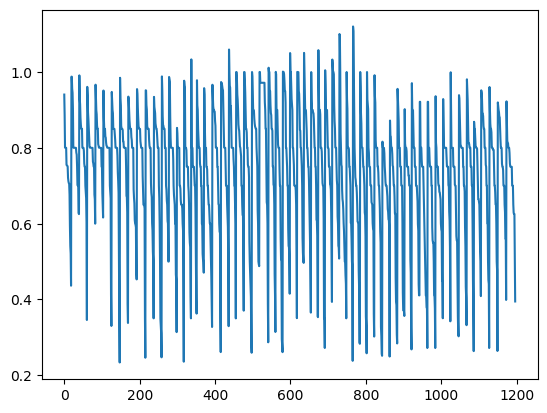

In [ ]:
# TODO 4.1


(array([ 34.,  59.,  38.,  74., 137., 250., 340., 151., 104.,  10.]),
 array([0.23370548, 0.32237868, 0.41105188, 0.49972508, 0.58839829,
        0.67707149, 0.76574469, 0.85441789, 0.9430911 , 1.0317643 ,
        1.1204375 ]),
 <a list of 10 Patch objects>)

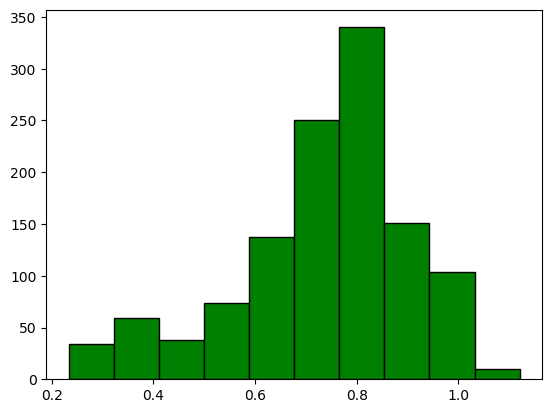

In [ ]:
# TODO 4.2


## Putting it all together
### Splitting data into features and targets
Later in the course we'll find that we will want to predict a given feature, which we refer to as our target. The remaining features in our data will acts as our input data to predict the target. Thus, it can be useful to split our input features and target into two different variables.  

To predict the target feature 'actual_productivity' we store the 'actual_productivity' column into a variable **T** and the treat the rest of the columns as input features, storing them inside **X**.

In [ ]:
# Store target feature in T
T = df.loc[:, 'actual_productivity'].copy()
T

0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_productivity, Length: 1197, dtype: float64

In [ ]:
# Store remaining features in X
X = df.iloc[:, :-1].copy()
X

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0


Notice that our `X` data contains strings for the 'date', 'quarter', 'department' and 'day' columns. Remeber we did not convert these strings to numerical data yet for our Pandas exmaple.

<div id='TODO5'></div>

### TODO5 (5 points)
1. Create a converter that replaces the string values for the 'date', 'quarter', 'department' and 'day' columns in `X` with numerical values using `datedic`, `quarterdic`, `departmentdic` and `daydic`.  
    1. Hint: Try using the `apply()` method for the Pandas DataFrame. Try finding the documentation on your own!*
    1. Hint: Notice we redefined the dictionaries from the *What is Numpy?* section, however we are not using bytestrings.

In [ ]:
# TODO 5.1

quarterdic = {'Quarter1': 1, 'Quarter2':2, 'Quarter3':3, 'Quarter4':4, 'Quarter5':5}
daydic = {'Sunday': 1, 'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5, 'Friday':6, 'Saturday':7 }
departmentdic = {'sweing': 1, 'finishing ':2, 'finishing':3}
dates_list = df["date"].unique()
datedic = {dates_list[i]:i+1 for i in range(len(dates_list))}



X

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,1,1,1,5,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0
1,1,1,2,5,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0
2,1,1,1,5,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
3,1,1,1,5,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
4,1,1,1,5,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,59,2,3,4,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0
1193,59,2,3,4,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0
1194,59,2,3,4,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0
1195,59,2,3,4,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0


In [ ]:
todo_check([
    ("np.all(X['quarter'].iloc[[0,1,200,513,516]].values == np.array([ 1,1,2,5,5]))", "X 'quarter' column has incorrect values"),
    ("np.all(X['day'].iloc[[0,1,200,513,516]].values == np.array([5, 5, 2, 5, 5]))", "X 'day' column has incorrect values"),
    ("np.all(X['department'].iloc[[0,1,200,513,516]].values == np.array([1, 2, 1, 2, 2]))", "X 'department' column has incorrect values"),
    ("np.all(X['date'].iloc[[0,1,200,513,516]].values == np.array([1, 1, 10, 25, 25]))", "X 'date' column has incorrect values"),
])

Your code PASSED the code check!


The following codes plots all the input features by using `subplot()` arranged in 7 by 2 grid (i.e. there are 7*2=14 suplots). The tight_layout() prevents the subfigures from overlapping.

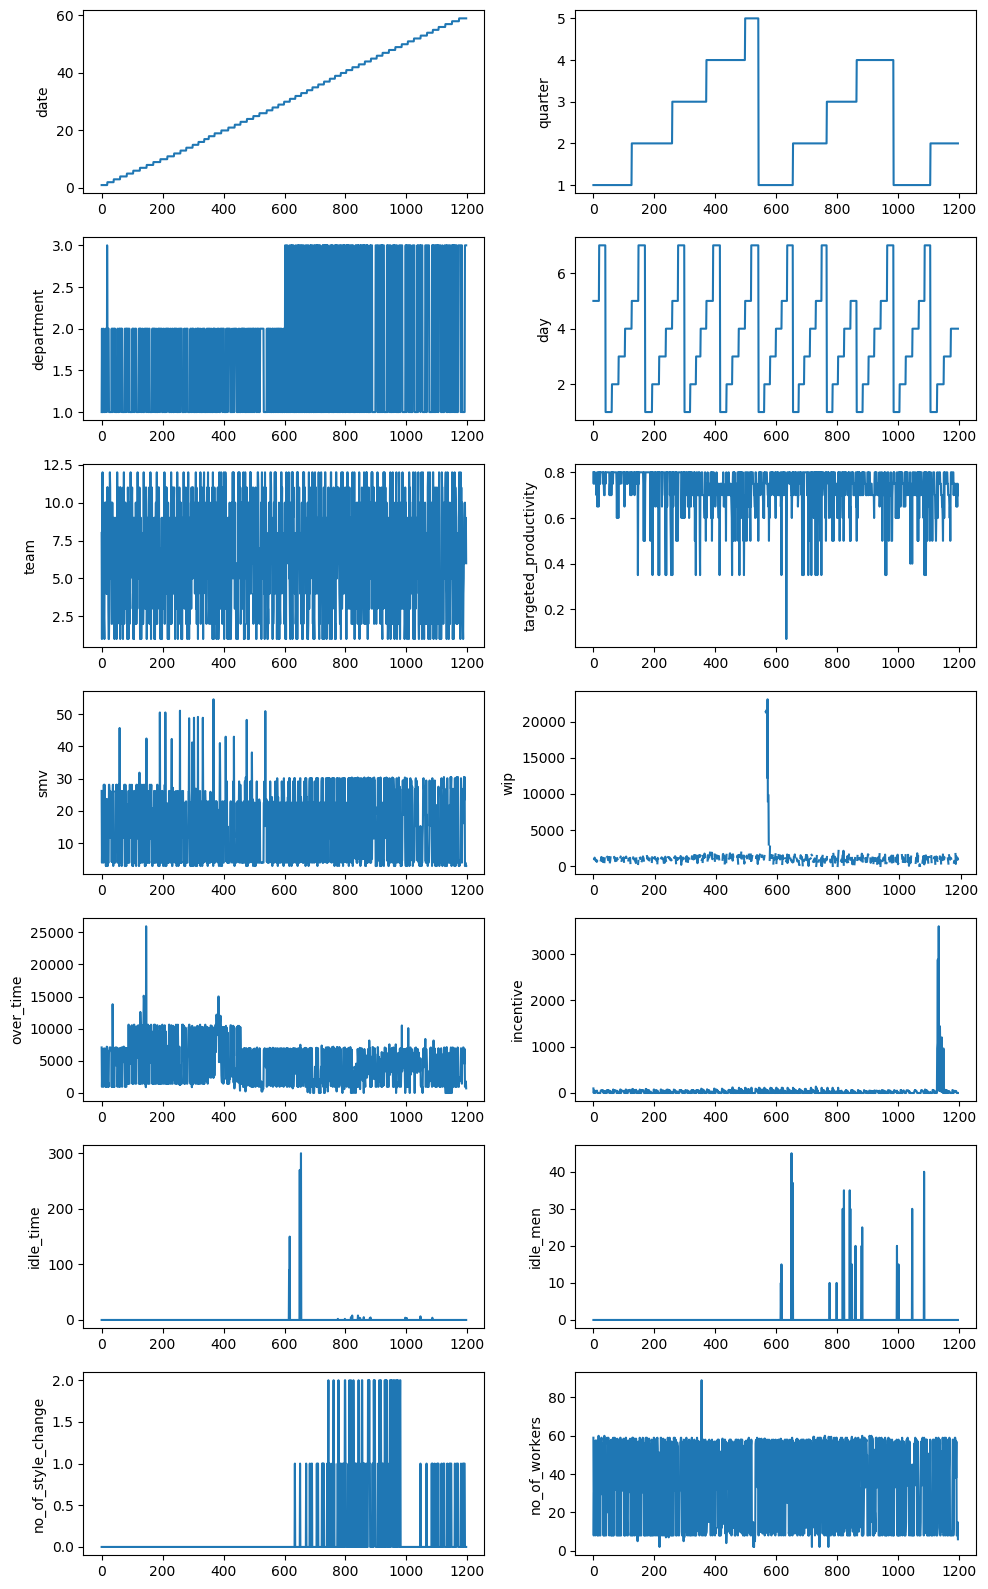

In [ ]:
fig = plt.figure(figsize=(10,16))
plt.clf() # Clear previous plt figure
for i in range(14):
    plt.subplot(7, 2, i+1) # Selects which subplot to plot to
    plt.plot(X.iloc[:, i]) # Plots a given column
    plt.ylabel(X.columns.values[i]) # Sets Y label
fig.tight_layout()

<div id='TODO6'></div>

### TODO6 (5 points)
1. Try to generate a 7 by 2 subplot of your own which plots the correlation between each input feature and the target 'actual_productivity'.
    1. Hint: The code should be very similar to the above example. Feel free to copy and paste the above code and modify it.
    

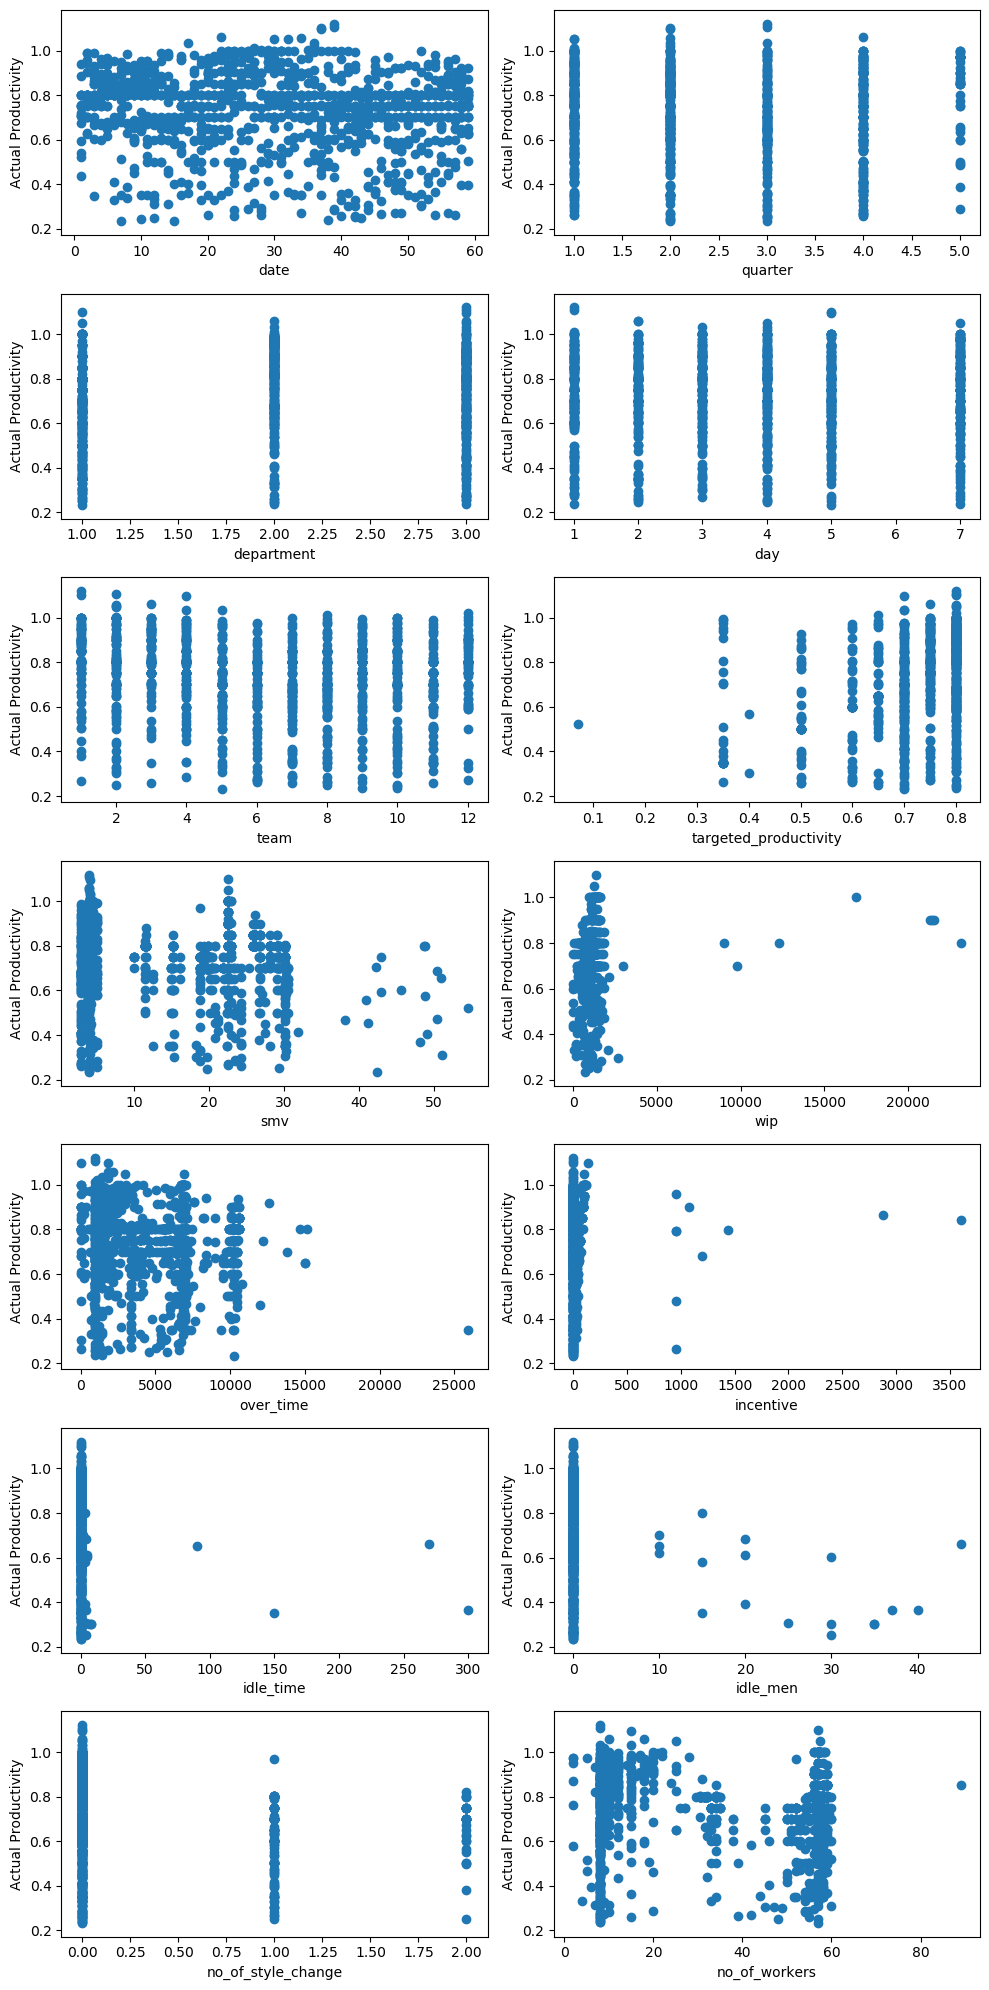

In [ ]:
# TODO 6.1


When it is necessary, you can concatenate multiple dataframes to recover your original dataframe. Checkout the code below which concats our data into D.

In [ ]:
D = pd.concat([X, T], axis=1)
D

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,1,1,5,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,1,2,5,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1,1,1,5,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1,1,1,5,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1,1,1,5,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,59,2,3,4,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,59,2,3,4,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,59,2,3,4,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,59,2,3,4,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


## Plot with Pandas

We can recreate the exact same plotting done above but now with Pandas plotting (recall Pandas plotting basically wraps Matplotlib or other plotting libraries).

Notice we are using `for i, c in enumerate(X.columns.values):` this allows us to use the data values found within `X.columns.values` without indexing it while the `enumerate()` Python function creates an increasing indexer `i`. Try uncommenting the print statement below to see for yourself what this for-loop is doing.

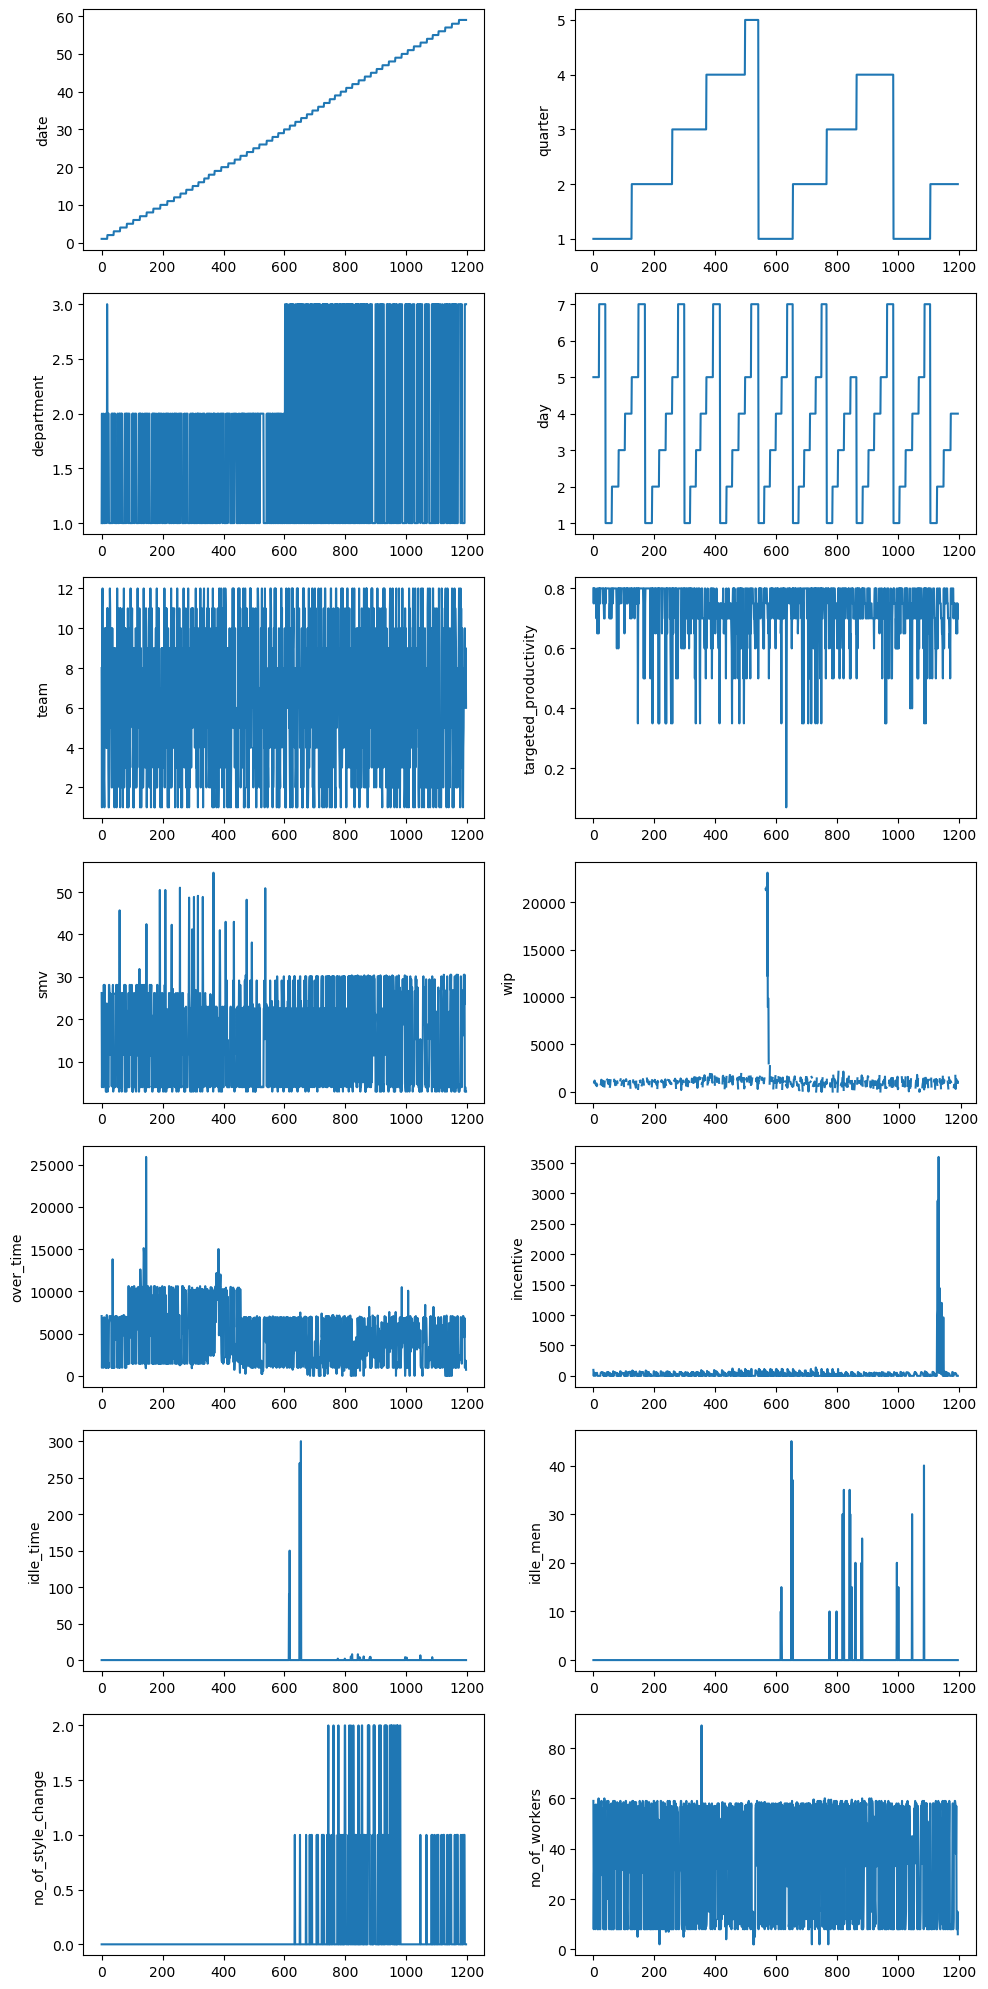

In [ ]:
# Try with Pandas plots
fig, axes = plt.subplots(7,2)
fig.set_figheight(20)
fig.set_figwidth(10)
for i, c in enumerate(X.columns.values):
    D.iloc[:, i].plot(y=c, ax=axes[int(i/2), i%2])
    axes[int(i/2), i%2].set_ylabel(c)
fig.tight_layout()

Sometimes, it does not make sense connect all the data points with a line as all the data points might not be related. Scatter plots can help you to present the data as a point without the connecting line.

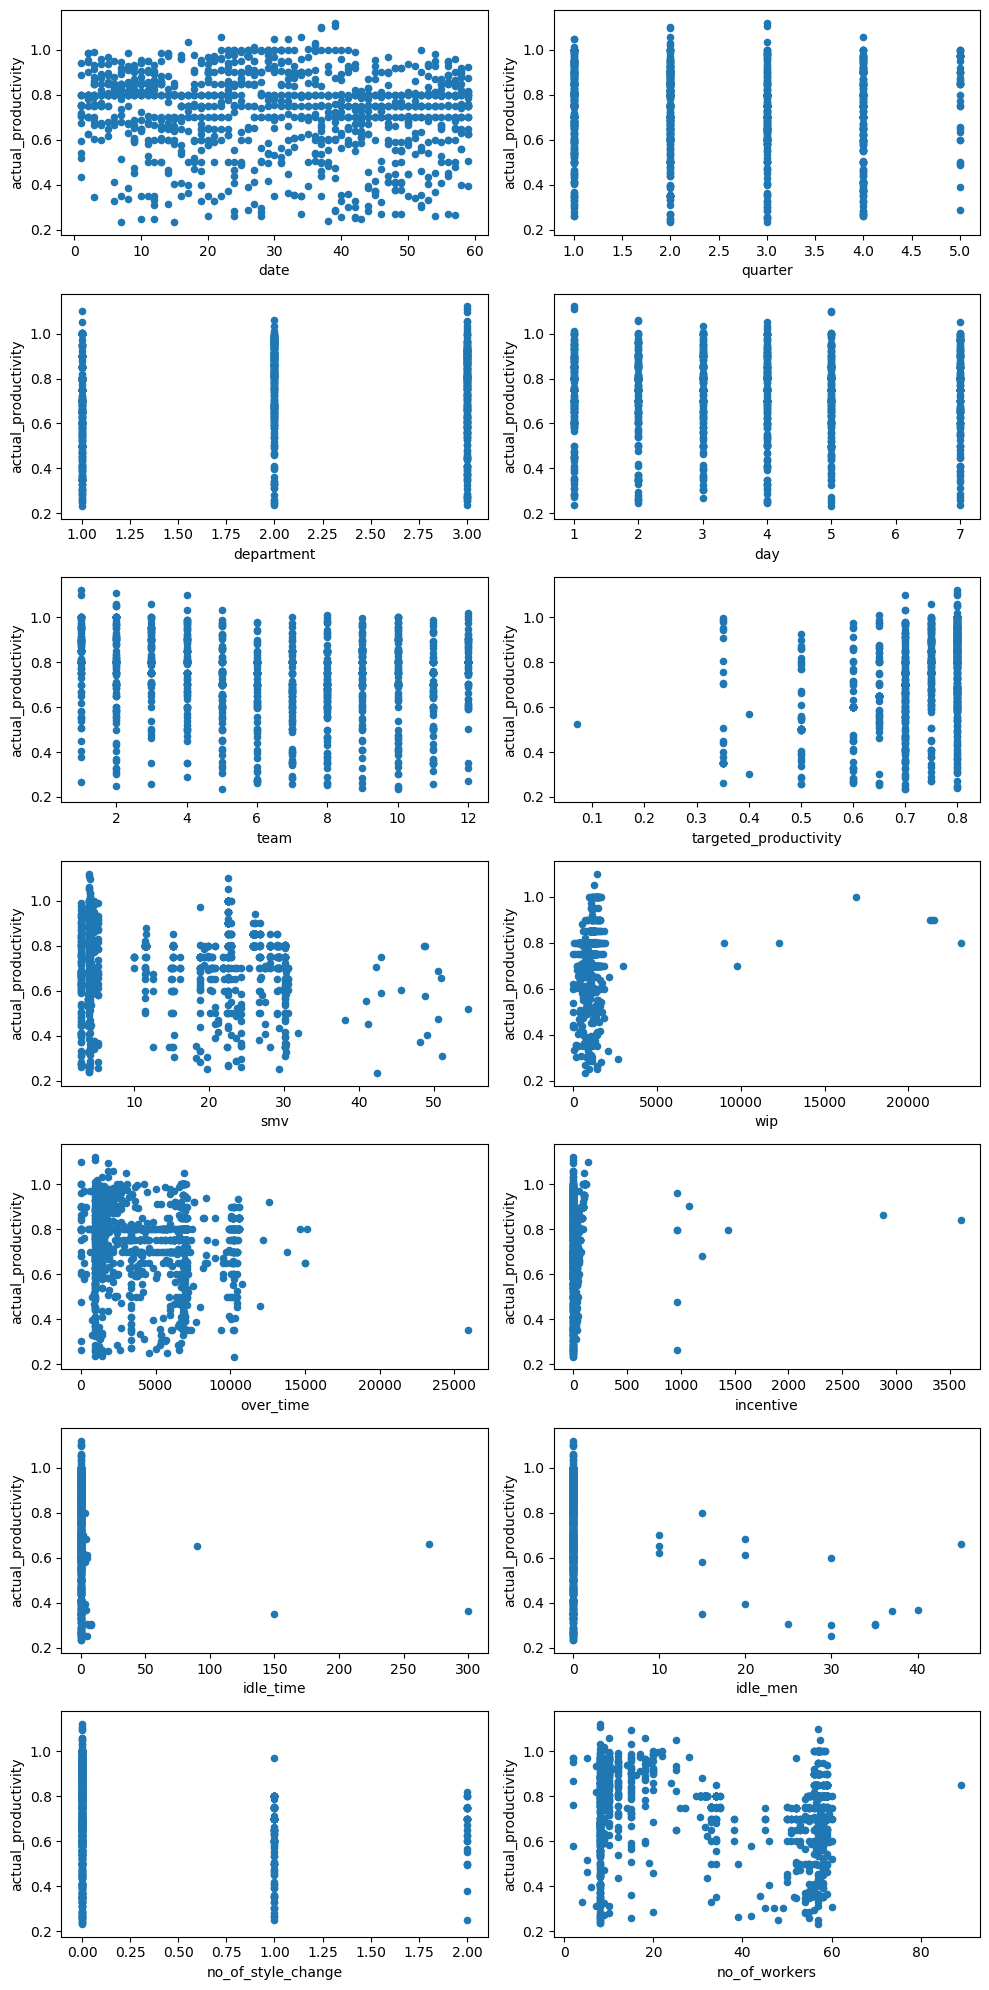

In [ ]:
def plot_scatter(D):
    """ Function to quickly create matplotlib subplots"""
    fig, axes = plt.subplots(7,2)
    fig.set_figheight(20)
    fig.set_figwidth(10)
    for i,c  in enumerate(X.columns.values):
        #D.plot.hexbin(c, 'area', ax=axes[int(i/4), i%4])
        D.plot.scatter(c, 'actual_productivity', ax=axes[int(i/2), i%2])
    fig.tight_layout()

plot_scatter(D)

Recall, that the histogram of target values (the 'actual_productivity' column) had many values towards the right (check out histogram below for reference). Meaning, our data is slightly skewed! This can be problematic in further analysis or ML model application. Therefore, to amplify these differences we want to spread out these values so that our data is less skewed.

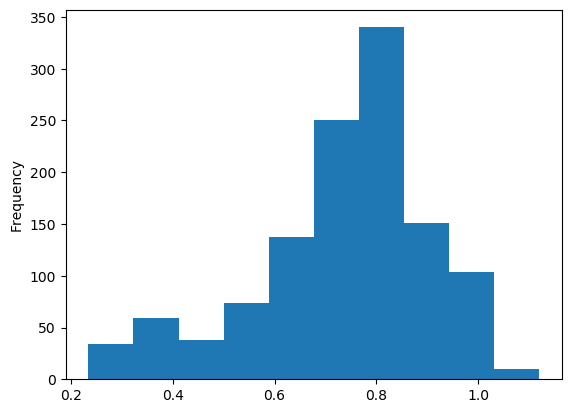

In [ ]:
T.plot.hist()

<div id='TODO7'></div>

### TODO7 (5 points)
1. Try applying the exponential to each sample in the target data `T`. Store the output back into `Texp`.
    1. Hint: Use Pandas `apply()` method again but now applying the log to every sample
    2. You can check the documentation on applying NumPy `exp()` function to get the exponent of each sample [here](https://numpy.org/doc/stable/reference/generated/numpy.exp.html)

In [ ]:
# TODO 7.1


Texp

0       2.561839
1       2.426622
2       2.226811
3       2.226811
4       2.226391
          ...   
1192    1.874484
1193    1.869414
1194    1.869414
1195    1.658459
1196    1.483972
Name: actual_productivity, Length: 1197, dtype: float64

In [ ]:
todo_check([
    ("np.all(np.isclose(np.array(Texp)[1193:], np.array([1.86941398, 1.86941398, 1.65845905, 1.48397192])))", "Texp has incorrect values."),
])

Your code PASSED the code check!


Let's concat these two targets to see the differences in the raw data

In [ ]:
pd.concat([T, Texp], axis=1)

,actual_productivity,actual_productivity
0,0.940725,2.561839
1,0.886500,2.426622
2,0.800570,2.226811
3,0.800570,2.226811
4,0.800382,2.226391
...,...,...
1192,0.628333,1.874484
1193,0.625625,1.869414
1194,0.625625,1.869414
1195,0.505889,1.658459


Run the code below to replot the histogram using the our newly generated exponential targets. Notice anything different? Taking the exponent has done exactly want we wanted! That is spread out the data values to amplify thier differences.

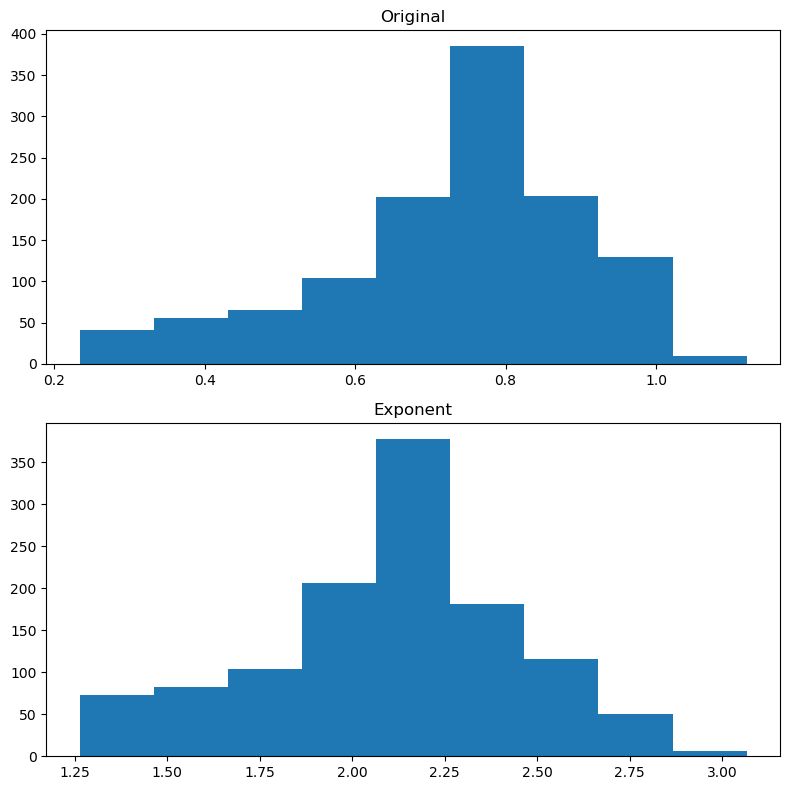

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.clf()
plt.subplot(2,1,1)
plt.hist(T, bins=9)
plt.title("Original")
plt.subplot(2,1,2)
plt.hist(Texp, bins=9)
plt.title("Exponent")
fig.tight_layout()

Explore performing the same operation by using other methods like applying various basic mathematical operations like square root, cube root, reciprocal, logarithm, etc. and notice the difference.

<div id='TODO8'></div>

### TODO8 (5 points)
1. Now recreate the above scatter plot by first concatenating `X` and `Texp` and storing the output into `D`.
2. Next, recreate the above scatter plot by using the `plot_scatter()` function and `D`.

In [ ]:
#TODO 8.1

D

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,1,1,5,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,2.561839
1,1,1,2,5,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,2.426622
2,1,1,1,5,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,2.226811
3,1,1,1,5,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,2.226811
4,1,1,1,5,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,2.226391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,59,2,3,4,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,1.874484
1193,59,2,3,4,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,1.869414
1194,59,2,3,4,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,1.869414
1195,59,2,3,4,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,1.658459


In [ ]:
todo_check([
    ("D.shape == (1197,15)", "D has the wrong shape."),
    ("np.all(np.isclose(D.loc[:, 'actual_productivity'][1193:], np.array([1.86941398, 1.86941398, 1.65845905, 1.48397192])))", "D column 'area' has incorrect values."),
])

Your code PASSED the code check!


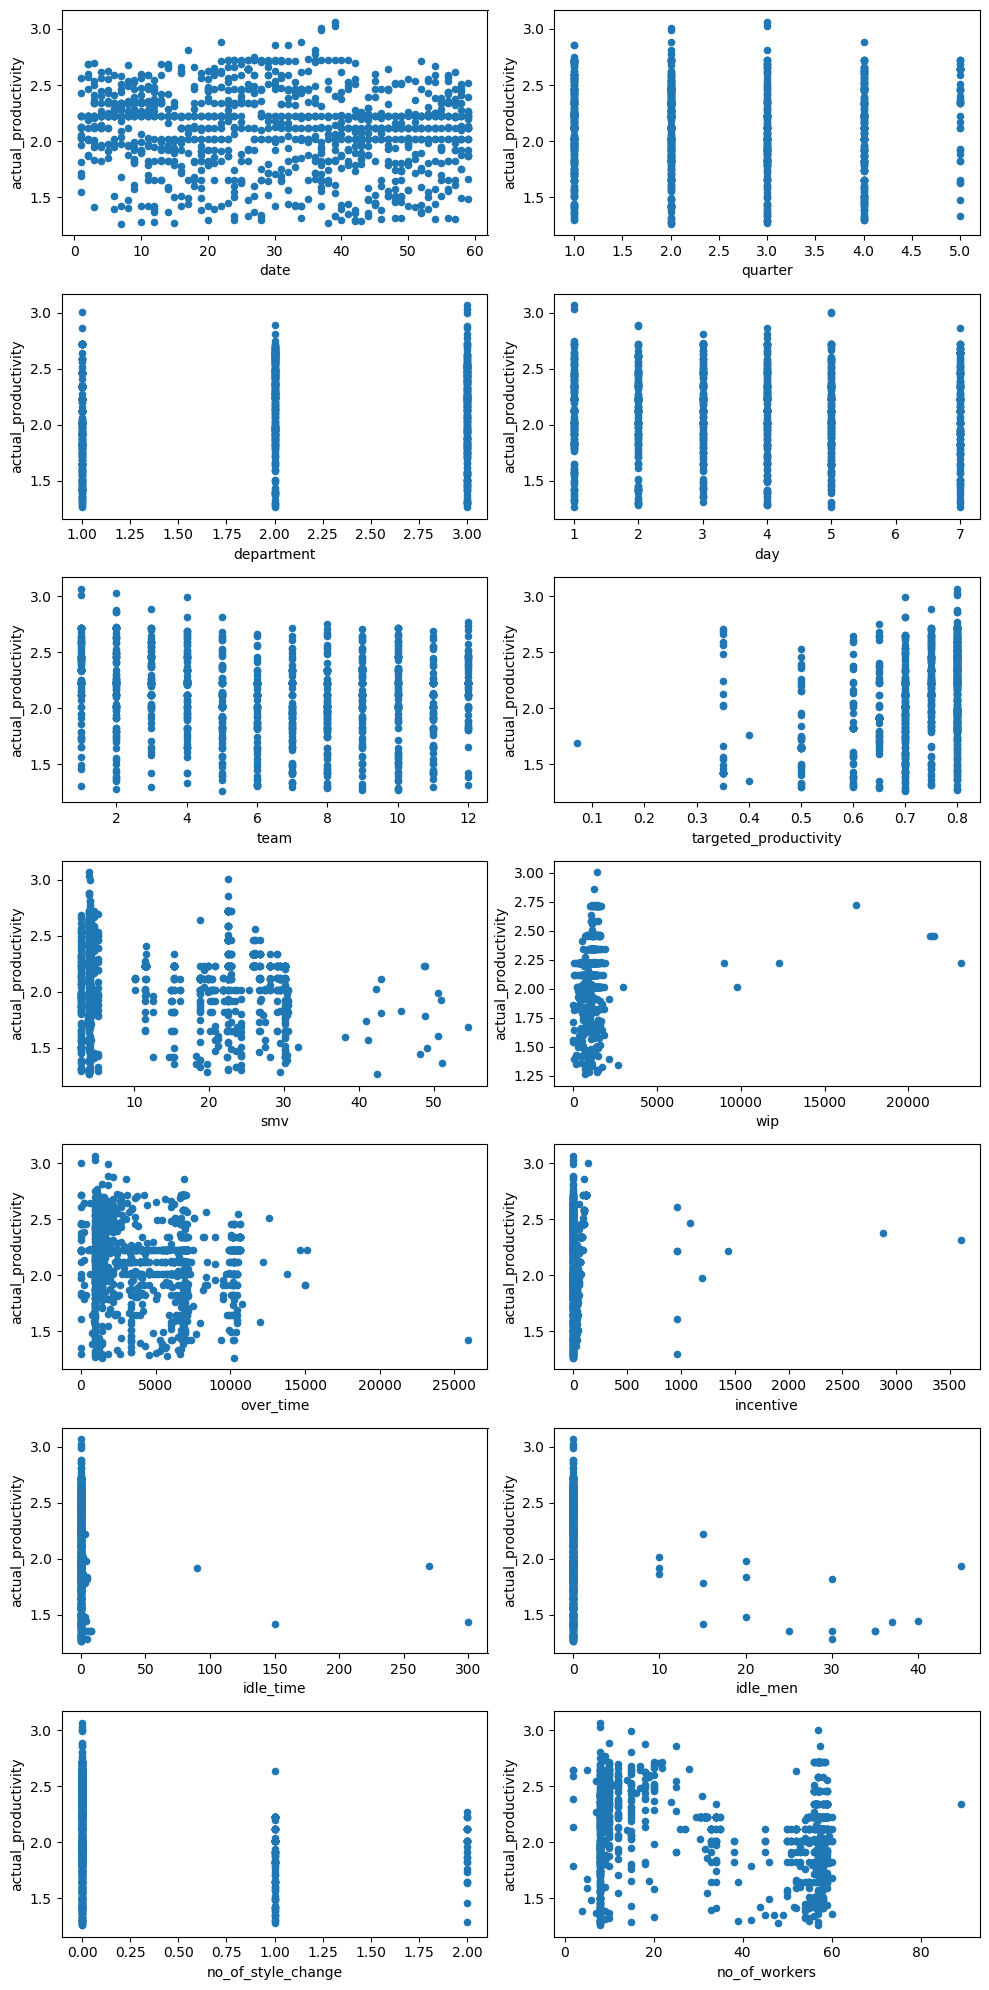

In [ ]:
#TODO 8.2


# Streamlit

Streamlit is a fancy dashboard tool for machine learning and data science. It creates data apps for you to navigate the data and your ML algorithms' performance well. Please install and play with it a bit in this exercise.

Please watch these four introductory videos that will greatly help you understand how simple and how easy it is and how powerful it can be for you to interact with data:
* [1/4: What is Streamlit](https://youtu.be/R2nr1uZ8ffc)
* [2/4: Install and play with Streamlit](https://youtu.be/sxLNCDnqyFc)
* [3/4: Let's build a data app!](https://youtu.be/VtrFjkSGgKM)
* [4/4 Self-driving use-case](https://www.youtube.com/watch?v=z8vgmvtgxCs)

If you want to know more about Streamlit, you can go over the documents in Streamlit.io (https://docs.streamlit.io/).


`%%writefile` magic command stores the content in the cell. Using the command, let us create a python file to run streamlit dashboard.
FYI, `%%writefile -a` appends the content to the existing file if exist.

<div id='TODO9'></div>

### TODO 9 (5 points)


1. First, create the stProductivity.py by running the cell below. Then, in a command shell prompt, run
  `streamlit run Productivity.py`
   under the working directory.
   Whenever you change the first by appending codes to the file, you can see "automaticall rerun or refreshed" strealit page.

2. Create a checkbox using streamlit.checkbox (st.checkbox after aliasing) and show the raw data only when the check box is selected.

3. Add a sidebar with a slider to choose a range of productivity values to see. Store the output into `min_prod` and `max_prod`.

Run the below cell for TODO 9.1

In [ ]:
%%writefile stProductivity.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SETTING PAGE CONFIG TO WIDE MODE
st.set_page_config(layout="wide")

# LOADING DATA
DATA_URL = (
    "https://archive.ics.uci.edu/static/public/597/productivity+prediction+of+garment+employees.zip"
)

"""
# Garment Workers Productivity

Abstract: This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts. (https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees)).


"""

@st.cache_data
def load_data(nrows):
    data = pd.read_csv(DATA_URL, nrows=nrows)
    return data

data = load_data(100000)


"## Summary"
st.dataframe(data.describe())


Overwriting stProductivity.py


Running the python file with streamlit, you can see the text and summary in your browser.

![image.png](https://webpages.charlotte.edu/mlee173/teach/ml/images/class/l2streamlit-1.png)

Run the below cell for TODO 9.2

In [ ]:
%%writefile -a stProductivity.py


"""
## Raw Data

We can see all the data here by pressing check button.
"""

if st.checkbox("Show Raw Data"):
    data


Appending to stProductivity.py


The capture screen will look like be once you complete the above cell properly.

![image-2.png](https://webpages.charlotte.edu/mlee173/teach/ml/images/class/l2streamlit-2.png)

In [ ]:
%%writefile -a stProductivity.py

"## Filtering Data by the Actual Productivity"
#TODO 9.3: add slider to the sidebar


Appending to stProductivity.py


Added sidebar will be similar to this:

![image.png](https://webpages.charlotte.edu/mlee173/teach/ml/images/class/l2streamlit-3.png)

<div id='TODO10'></div>

### TODO 10 (5 points)


1. Filter the data `min_prod` and `max_prod` variables set in the previous TODO data.

2. Produce the four figures that shows 1) productivity histogram (as above), 2) actual_productivity against targeted_productivity graph, 3) actual_productivity against no_of_workers graph, and 4) actual_productivity against smv graph

3. Have fun to play with your first streamlit dashboard!

<font color="red">NOTE: When you rerun the cell with append `-a` multiple times, the content will be appended repeatedly. Simple fix for the will be rerunning the first write cell and go through. </font>

In [ ]:
%%writefile -a stProductivity.py


#TODO 10.1


"The number of filtered data samples: ", data.shape[0]

Appending to stProductivity.py


After selecting the area range, you can see the subsamples are in the data now.
Here the range selected was between 0.00 and 0.50. The filtered count now is 133 out of 1197.

![image.png](https://webpages.charlotte.edu/mlee173/teach/ml/images/class/l2streamlit-4.png)

In [ ]:
%%writefile -a stProductivity.py


fig, axes = plt.subplots(2,2)

# TODO 10.2

# TODO: Using plot.hist in pandas, plot histogram of actual_productivity data in axes[0][0] (top-right subplot area)

# TODO: Using plot.hist in pandas, plot actual_productivity vs target_productivity data in axes[0][1] (top-right subplot area)


# TODO: Using plot in pandas, plot actual_productivity vs no_of_workers in axes[1][0] (bottom-left subplot area)


# TODO: Using plot in pandas, plot actual_productivity vs smv in axes[1][1] (bottom-right subplot area)


plt.tight_layout()
st.pyplot(fig)


Appending to stProductivity.py


Enjoy the interactive figures while changing the slider on left.

![image.png](https://webpages.charlotte.edu/mlee173/teach/ml/images/class/l2streamlit-5.png)

In [ ]:
# This will delete the variables defined in the above section to
# prevent conflicts in future sections.
garbage_collect(['X', 'T', 'D', 'Texp'])

# Data Cleaning

As the first step of data preprocessing, let us make sure our data to be clean. This can be done by dropping the data samples with missing data. Let us try that first.


<div id='TODO11'></div>

### TODO11 (5 points):

1. Refer to the lecture slides, clean your garments_worker_productivity data by simply dropping the rows with missing values. Store the cleaned data to `df_ign`.

In [ ]:
print(f"Original shape: {df.shape}")

# TODO 11.1

print(f"New shape {df_ign.shape}")

Original shape: (1197, 15)
New shape (691, 15)


In [ ]:
todo_check([
    ("not df_ign.isnull().values.any()", "df_ign still has NaN values"),
    ("df_ign.shape == (691,15)", "df_ign has wrong shape."),
])

Your code PASSED the code check!


In [ ]:
i_missing = np.where(df.isna())[0]

In [ ]:
df.iloc[i_missing, :]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


## Most Frequent Imputation

Let us now practice to impute the missing values with mean of the data.

<div id='TODO12'> </div>

### TODO12-1 (4 points)

1. Using `SimpleImputer` in Scikit-Learn, replace the missing values (NaN) with the most frequent values in the data. Store the cleaned data into `df_freq`.


In [ ]:
from sklearn.impute import SimpleImputer

# TODO 12-1.1

display(df_freq)
np.any(df_freq.isna())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1/1/2015,Quarter1,sweing,Thursday,8,0.8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.8865
2,1/1/2015,Quarter1,sweing,Thursday,11,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,0.80057
3,1/1/2015,Quarter1,sweing,Thursday,12,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,0.80057
4,1/1/2015,Quarter1,sweing,Thursday,6,0.8,25.9,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.7,3.9,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,1039.0,1800,0,0.0,0,0,15.0,0.505889


False

In [ ]:
todo_check([
    ("not np.any(df_freq.isna())", "df_freq still has NaN values"),
    ("df_freq.iloc[13, 0] == '1/1/2015'", "df_freq has incorrect values.")
])


Your code PASSED the code check!


In [ ]:
df_freq.iloc[i_missing, :]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.8865
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,1039.0,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.9,1039.0,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,1039.0,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.7,3.9,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,1039.0,1800,0,0.0,0,0,15.0,0.505889


## Mean Imputation

I admit most frequently appeared values have higher chances to reappear but it may not be true always. Let us see if we can replace the data with average of the column rather than the most frequent values.

<div id='TODO12-2'> </div>

### TODO12-2 (3 points)

1. Using `SimpleImputer` in Scikit-Learn, replace the missing values (NaN) with the mean values in the data. Store the clean data into `dfauto_mean`.

    * HINT: You can simply copy and paste TODO 12.1 and modify it. This TODO should result in an error! ;)

In [ ]:
from sklearn.impute import SimpleImputer


try:
    # TODO 12-2.1

except ValueError as e:
    exc = e
    traceback.print_exc()


Traceback (most recent call last):
  File "C:\Users\Avinash\AppData\Local\Temp\ipykernel_7616\324453634.py", line 7, in <module>
    df_mean = pd.DataFrame(imp.fit_transform(df))
  File "C:\Users\Avinash\Anaconda3\lib\site-packages\sklearn\base.py", line 852, in fit_transform
    return self.fit(X, **fit_params).transform(X)
  File "C:\Users\Avinash\Anaconda3\lib\site-packages\sklearn\impute\_base.py", line 319, in fit
    X = self._validate_input(X, in_fit=True)
  File "C:\Users\Avinash\Anaconda3\lib\site-packages\sklearn\impute\_base.py", line 285, in _validate_input
    raise new_ve from None
ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '1/1/2015'


In [ ]:
todo_check([
    ("isinstance(exc, ValueError)", "exc should be a ValueError!"),
    ("str(exc).startswith('Cannot use mean strategy with non-numeric data')", "exc contains the wrong ValueError")
])

Your code PASSED the code check!


Whaaaaaaaaaaat?

You must have followed the instructions but ended up with an error! If you look into the error, you can see that the imputer complains that it cannot apply the mean strategy for the string values.

Well, the truth is we do not have any missing values in that string column.
So, before moving forward, let us convert the string columns as we did in TODO 5.


By running the cell below, you can see how many unique dates are in this data set.

In [ ]:
df["date"].unique().shape

(59,)

<div id='TODO12-3'> </div>

### TODO12-3 (3 points)


1. Modify TODO 12.2 to convert all the string columns so we can run mean imputation (copy and paste YOUR code, not the try-except). Once you have ran mean imputation, store the results in the `df_mean` variable.
    1. Do these operations on the dataframe `new_df` created in the below cell.

In [ ]:
quarterdic = {'Quarter1': 1, 'Quarter2':2, 'Quarter3':3, 'Quarter4':4, 'Quarter5':5}
daydic = {'Sunday': 1, 'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5, 'Friday':6, 'Saturday':7 }
departmentdic = {'sweing': 1, 'finishing ':2, 'finishing':3}
dates_list = df["date"].unique()
datedic = {dates_list[i]:i+1 for i in range(len(dates_list))}

new_df = df.copy()
new_df['date'] = new_df['date'].apply(lambda x: datedic[x])
new_df['quarter'] = new_df['quarter'].apply(lambda x: quarterdic[x])
new_df['department'] = new_df['department'].apply(lambda x: departmentdic[x])
new_df['day'] = new_df['day'].apply(lambda x: daydic[x])
new_df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,1,1,5,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,1,2,5,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1,1,1,5,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1,1,1,5,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1,1,1,5,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,59,2,3,4,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,59,2,3,4,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,59,2,3,4,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,59,2,3,4,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
from sklearn.impute import SimpleImputer
# TODO 12-3.1

display(df_mean)
np.any(df_mean.isna())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,1.0,1.0,5.0,8.0,0.80,26.16,1108.000000,7080.0,98.0,0.0,0.0,0.0,59.0,0.940725
1,1.0,1.0,2.0,5.0,1.0,0.75,3.94,1190.465991,960.0,0.0,0.0,0.0,0.0,8.0,0.886500
2,1.0,1.0,1.0,5.0,11.0,0.80,11.41,968.000000,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
3,1.0,1.0,1.0,5.0,12.0,0.80,11.41,968.000000,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
4,1.0,1.0,1.0,5.0,6.0,0.80,25.90,1170.000000,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,59.0,2.0,3.0,4.0,10.0,0.75,2.90,1190.465991,960.0,0.0,0.0,0.0,0.0,8.0,0.628333
1193,59.0,2.0,3.0,4.0,8.0,0.70,3.90,1190.465991,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1194,59.0,2.0,3.0,4.0,7.0,0.65,3.90,1190.465991,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1195,59.0,2.0,3.0,4.0,9.0,0.75,2.90,1190.465991,1800.0,0.0,0.0,0.0,0.0,15.0,0.505889


False

In [ ]:
todo_check([
    ("not np.any(df_mean.isna())", "df_mean still has NaN values"),
    ("np.isclose(df_mean.iloc[2, 7], 968.0)", "df_mean has incorrect values.")
])

Your code PASSED the code check!


In [ ]:
df_mean.iloc[i_missing, :]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,1.0,1.0,2.0,5.0,1.0,0.75,3.94,1190.465991,960.0,0.0,0.0,0.0,0.0,8.0,0.886500
6,1.0,1.0,2.0,5.0,2.0,0.75,3.94,1190.465991,960.0,0.0,0.0,0.0,0.0,8.0,0.755167
13,1.0,1.0,2.0,5.0,10.0,0.65,3.94,1190.465991,960.0,0.0,0.0,0.0,0.0,8.0,0.705917
14,1.0,1.0,2.0,5.0,8.0,0.75,2.90,1190.465991,960.0,0.0,0.0,0.0,0.0,8.0,0.676667
15,1.0,1.0,2.0,5.0,4.0,0.75,3.94,1190.465991,2160.0,0.0,0.0,0.0,0.0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,59.0,2.0,3.0,4.0,10.0,0.75,2.90,1190.465991,960.0,0.0,0.0,0.0,0.0,8.0,0.628333
1193,59.0,2.0,3.0,4.0,8.0,0.70,3.90,1190.465991,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1194,59.0,2.0,3.0,4.0,7.0,0.65,3.90,1190.465991,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1195,59.0,2.0,3.0,4.0,9.0,0.75,2.90,1190.465991,1800.0,0.0,0.0,0.0,0.0,15.0,0.505889


Now the replaced values are different from the ones with the previous frequency imputation.


## Nearest Neighbor Imputation

Let us try a bit smarter imputation. Instead of using the average of all the data samples, rely only on its neighbors.

<div id='TODO12-4'></div>

### TODO12-4 (3 points)

1. Using `KNNImputer`, replace the missing values with the average (`uniform`) of the 5 neighbors' values. Store the clean data to `df_knn`.
    1. Do this operation on `new_df` created above.

In [ ]:
from sklearn.impute import KNNImputer

# TODO 12-4.1

display(df_knn)
np.any(df_knn.isna())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,1.0,1.0,5.0,8.0,0.80,26.16,1108.0,7080.0,98.0,0.0,0.0,0.0,59.0
1,1.0,1.0,2.0,5.0,1.0,0.75,3.94,994.4,960.0,0.0,0.0,0.0,0.0,8.0
2,1.0,1.0,1.0,5.0,11.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5
3,1.0,1.0,1.0,5.0,12.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5
4,1.0,1.0,1.0,5.0,6.0,0.80,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,59.0,2.0,3.0,4.0,10.0,0.75,2.90,994.4,960.0,0.0,0.0,0.0,0.0,8.0
1193,59.0,2.0,3.0,4.0,8.0,0.70,3.90,994.4,960.0,0.0,0.0,0.0,0.0,8.0
1194,59.0,2.0,3.0,4.0,7.0,0.65,3.90,994.4,960.0,0.0,0.0,0.0,0.0,8.0
1195,59.0,2.0,3.0,4.0,9.0,0.75,2.90,632.8,1800.0,0.0,0.0,0.0,0.0,15.0


False

In [ ]:
todo_check([
    ("not np.any(df_knn.isna())", "df_knn still has NaN values"),
    ("np.isclose(df_knn.iloc[1192, 7], 994.4)", "df_knn has incorrect values.")
])

Your code PASSED the code check!


In [ ]:
df_knn.iloc[i_missing, :]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,1.0,1.0,2.0,5.0,1.0,0.75,3.94,994.4,960.0,0.0,0.0,0.0,0.0,8.0
6,1.0,1.0,2.0,5.0,2.0,0.75,3.94,994.4,960.0,0.0,0.0,0.0,0.0,8.0
13,1.0,1.0,2.0,5.0,10.0,0.65,3.94,994.4,960.0,0.0,0.0,0.0,0.0,8.0
14,1.0,1.0,2.0,5.0,8.0,0.75,2.90,994.4,960.0,0.0,0.0,0.0,0.0,8.0
15,1.0,1.0,2.0,5.0,4.0,0.75,3.94,919.6,2160.0,0.0,0.0,0.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,59.0,2.0,3.0,4.0,10.0,0.75,2.90,994.4,960.0,0.0,0.0,0.0,0.0,8.0
1193,59.0,2.0,3.0,4.0,8.0,0.70,3.90,994.4,960.0,0.0,0.0,0.0,0.0,8.0
1194,59.0,2.0,3.0,4.0,7.0,0.65,3.90,994.4,960.0,0.0,0.0,0.0,0.0,8.0
1195,59.0,2.0,3.0,4.0,9.0,0.75,2.90,632.8,1800.0,0.0,0.0,0.0,0.0,15.0


The replaced values are not same as before, which may be more reasonable than the other naive approaches. Let us save the data for later linear model practice.  

# Data Reduction

Now, let us switch the gear and practice reducing the data. As we learn in the lecture, we can either reduce the dimensionality of data or reduce the number of data samples. Let us briefly taste them.

Here we practice subsampling to reduce the data. Subsampling is often useful to avoid computational overhead when it is properly used (without breaking original distribution of data). Scikit-Learn resample is designed for bootstraping by performing one-step for it. If you are interested in bootstrapping, please refer to these gentle introductions ([one](https://statisticsbyjim.com/hypothesis-testing/bootstrapping/), [another](https://online.stat.psu.edu/stat555/node/119/)).

<div id='TODO13'></div>


### TODO13 (5 points)

1. Using `sklearn.utils.resample`, sample only 100 samples from the data `new_df`. Store it to `df_sample`.

In [ ]:
from sklearn.utils import resample
# TODO 13.1

display(df_sample)
df_sample.shape

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1029,52,1,1,3,12,0.8,15.26,983.0,4080,50,0.0,0,0,34.0,0.800402
339,17,3,1,3,8,0.8,25.90,1434.0,10170,50,0.0,0,0,56.5,0.800129
1051,53,1,3,4,1,0.7,3.94,NaN,960,0,0.0,0,0,8.0,0.806879
263,13,3,2,5,9,0.8,3.94,NaN,1440,0,0.0,0,0,8.0,0.858144
955,48,4,3,5,12,0.8,4.60,NaN,3780,0,0.0,0,0,9.0,0.590617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,5,1,2,3,2,0.8,3.94,NaN,1440,0,0.0,0,0,8.0,0.805909
230,11,2,1,3,3,0.8,42.27,465.0,9900,54,0.0,0,0,55.0,0.705577
519,26,5,1,7,2,0.8,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
418,21,4,2,1,1,0.7,3.94,NaN,1440,0,0.0,0,0,8.0,0.970076


(100, 15)

In [ ]:
todo_check([
    ("df_sample.shape == (100,15)", "df_sample has the wrong shape")
])

Your code PASSED the code check!


Do you remember how many data samples we had in each actual_productivity values? To remind ourselves, we can plot the histogram again.

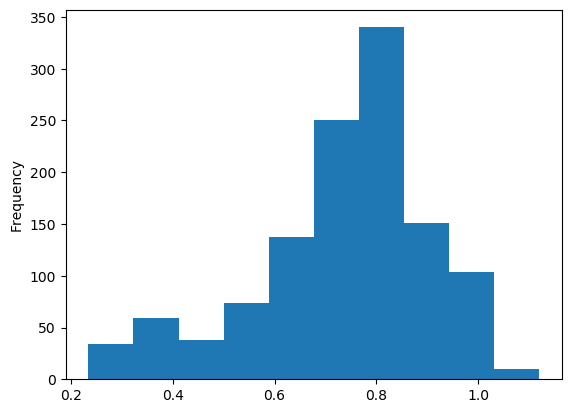

In [ ]:
new_df['actual_productivity'].plot.hist()

OK, after resampling, does this distribution changed? Let us check.

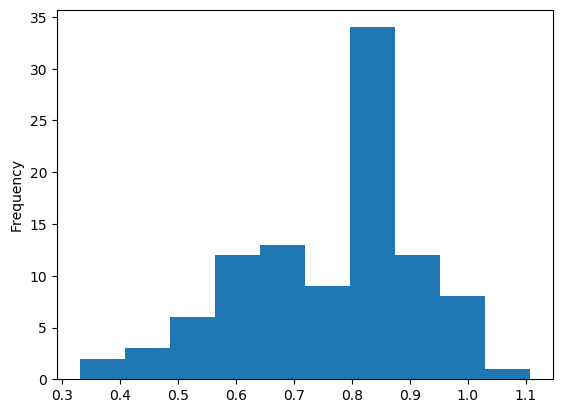

In [ ]:
df_sample['actual_productivity'].plot.hist()

Wow, the sample distribution has been changed quite a lot. Well, this might not what we intended to do. For instance, when you have data with different distributions, the diference in the quantity of data can easily mess up your prediction model as the prediction error can be greatly penalized by the majority. Therefore, sampling some **representative data** from each subgroup is more useful as the following practice.

Try to sample data without change the output distribution. We call this stratified sampling, which samples from each subpartitions (strata). The figure below from Wikipedia illustrates well the stratified sampling.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Stratified_sampling.PNG/220px-Stratified_sampling.PNG)

<div id='TODO14'></div>

### TODO14 (5 points)

1. Call `resample` function to sample 100 samples from `new_df` but using `stratify` option. Store the samples to `df_strat`.
    1. Hint: Refer to the [reference](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html) to know how to use the option.

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
927,47,4,1,4,4,0.80,30.10,323.0,4080,50,0.0,0,1,59.0,0.800809
565,28,1,1,2,10,0.80,22.52,21540.0,6720,88,0.0,0,0,56.0,0.900130
75,4,1,1,2,4,0.80,28.08,759.0,6900,50,0.0,0,0,57.5,0.800077
1189,59,2,1,4,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1179,59,2,1,4,3,0.80,30.10,735.0,6960,63,0.0,0,1,58.0,0.800072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,5,1,2,3,8,0.80,2.90,NaN,1440,0,0.0,0,0,8.0,0.681061
524,26,5,2,7,1,0.75,3.94,NaN,1800,0,0.0,0,0,15.0,0.971867
964,49,4,3,7,3,0.80,4.60,NaN,6300,0,0.0,0,0,15.0,0.921704
1110,56,2,3,1,4,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.890604


(100, 15)

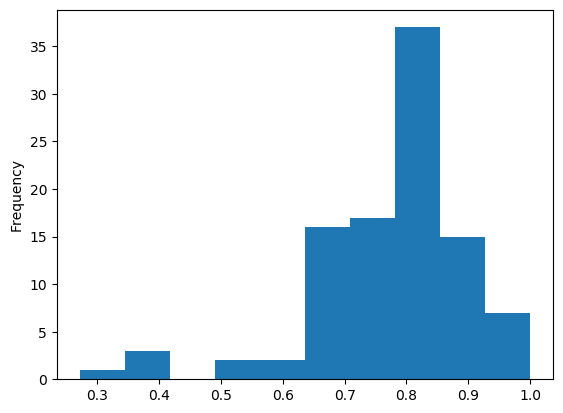

In [ ]:
# TODO 14.1


display(df_strat)
df_strat['actual_productivity'].plot.hist()
df_strat.shape

In [ ]:
todo_check([
    ("df_strat.shape == (100,15)", "df_strat has the wrong shape")
])

Your code PASSED the code check!


Now we can see the distribution is almost maintained after sampling!

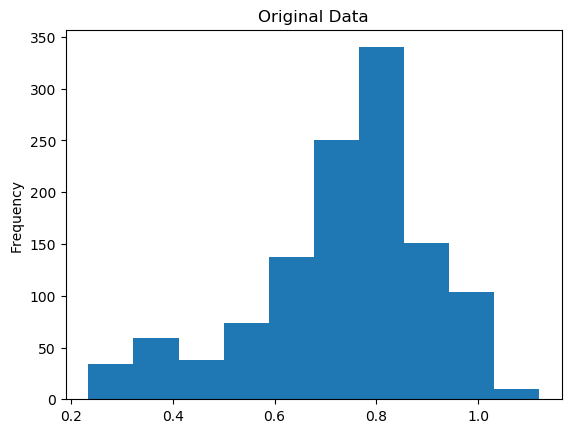

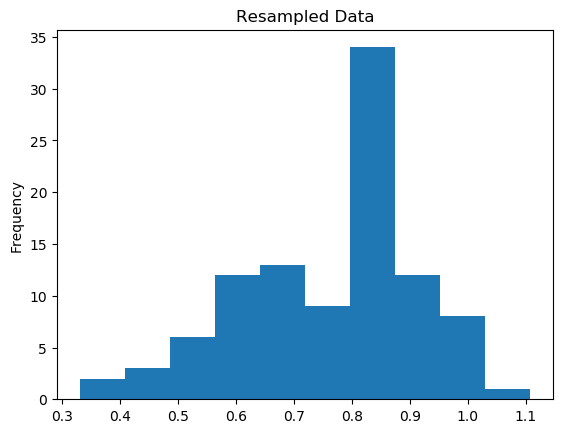

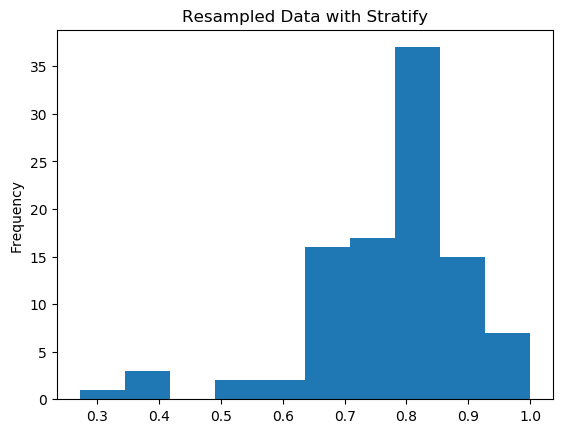

In [ ]:
new_df['actual_productivity'].plot.hist()
plt.title("Original Data")
plt.show()
df_sample['actual_productivity'].plot.hist()
plt.title("Resampled Data")
plt.show()
df_strat['actual_productivity'].plot.hist()
plt.title("Resampled Data with Stratify")
plt.show()

## Dimensionality Reduction

High dimensionality of data causes various problems known as *Curse of dimensionality*. One notable thing that we can easily assume is the computational complexity. Also, the model performance (accuracy and stability) drops very quickly as the complexity of problem surges when the dimensionality grows.  

We will learn more about dimensionality reduction in Unsupervised Learning module later in this semester. For now, let us practice simple Principal Component Analysis (PCA) just for tasting the water.
PCA finds a projection that caputres the largest amount of variation in data, so we can discard pricipal components that have low variations (so less impact on model prediction). Please hold your curiosity later when we learn unsupervised learnig in the later module. Here you can just see how pca is used as a tool to reduce the dimensionality of data.




In [ ]:
from sklearn.decomposition import PCA

print(df_knn.shape)

pca = PCA(n_components=5)

df_pca = pd.DataFrame(pca.fit_transform(df_knn))

# Note, alternatively we could do the following...
# pca.fit(df)
# df_pca = pd.DataFrame(pca.transform(df))

display(df_pca)

# percentage of variance explained by each of the selected components.
pca.explained_variance_ratio_

(1197, 14)


,0,1,2,3,4
0,2511.870524,-73.714671,60.513477,9.760763,-27.249794
1,-3607.275806,85.739909,-39.853151,30.174454,-16.702601
2,-911.079880,-61.004938,11.665630,21.956188,-20.718668
3,-911.079981,-61.004990,11.665480,21.959923,-20.718948
4,-2640.127751,218.582653,9.849170,-3.244237,-49.174079
...,...,...,...,...,...
1192,-3607.355877,85.747399,-39.198540,-10.794045,24.174497
1193,-3607.353472,85.747487,-39.195774,-11.105925,23.873430
1194,-3607.353372,85.747538,-39.195626,-11.109687,23.873735
1195,-2784.338376,-313.030788,-36.502157,-13.000336,23.550644


array([8.48236110e-01, 1.49774786e-01, 1.93190839e-03, 2.64428401e-05,
       1.53689568e-05])

Here, we observe transformed data `df_pca` now have 5 components, from 15 columns after removing low varying components out. The last 5 outputs show the percentage of variance by each component, indexed by 0 to 4 in each column. It seems the first component is dominating the changes and as you can see the last three components do not vary a lot.

Note that here when we reduce the dimensionality, we include the target labels naively. If your goal is making a prediction from reduced data, you may set aside the target label 'actual_productivity' and reduce the dimensionality of input data with 14 columns instead of the entire data as we did here.

# Data Transformation

When we have different scale of input data, the weight analysis we did last week can be misleading as we did not consider the different input scales. Not only for the accuracy of ML models, for the analysis, it is also important to have scaled input values. In the learning perspective, when updating the parameters of the ML models, different scales often misguide the direction of changes, which are often dominated by the large values.

By normalizing the inputs, we can scale the input features to similar range.


<div id='TODO15'></div>


### TODO15-1 (3 points)

1. Using the data `df_knn` as input, use Sklearn's `Normalizer` class to apply the max norm. Store the scaled input into `df_scalemax`.
    1. Hint: Remember to pass 'max' as the norm we wish to use to the proper argument.


In [ ]:
from sklearn.preprocessing import Normalizer

# TODO 15-1.1

df_scalemax.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.013855,0.001031,0.000874,0.001541,0.002914,0.000318,0.004177,0.387579,0.957917,0.012634,0.000167,0.000353,0.000050,0.010023
std,0.019308,0.001268,0.000985,0.001767,0.004537,0.000349,0.007274,0.315254,0.180172,0.075662,0.002136,0.005599,0.000359,0.021122
min,0.000139,0.000043,0.000039,0.000086,0.000059,0.000010,0.000263,0.000989,0.000000,0.000000,0.000000,0.000000,0.000000,0.001389
25%,0.003047,0.000287,0.000145,0.000439,0.000694,0.000105,0.002306,0.141762,1.000000,0.000000,0.000000,0.000000,0.000000,0.005556
50%,0.007532,0.000601,0.000275,0.000877,0.001488,0.000189,0.003264,0.236601,1.000000,0.000000,0.000000,0.000000,0.000000,0.008262
75%,0.016667,0.001389,0.001389,0.002011,0.003750,0.000556,0.004070,0.575833,1.000000,0.007212,0.000000,0.000000,0.000000,0.008333
max,0.330097,0.019417,0.009709,0.019417,0.106796,0.007282,0.164246,1.000000,1.000000,1.000000,0.043860,0.167598,0.011173,0.524272


In [ ]:
todo_check([
    ("np.all(np.isclose(df_scalemax.describe().loc['mean', [0,3,5]].values, np.array([0.01385537, 0.00154133, 0.00031804])))",
     "df_scalemax has incorrect values")
])

Your code PASSED the code check!


## Standardization

<div id='TODO15-2'></div>

### TODO15-2 (3 points)

1. Now scale the data `df_knn` with Sklearn's `StandardScaler` class. Store the scaled data into `df_zscale`.

In [ ]:
from sklearn.preprocessing import StandardScaler

# TODO 15-2.1


df_zscale.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1.197000e+03,1.197000e+03,1.197000e+03,1.197000e+03,1.197000e+03,1.197000e+03,1.197000e+03,1.197000e+03,1.197000e+03,1.197000e+03,1.197000e+03,1.197000e+03,1.197000e+03,1.197000e+03
mean,1.295909e-15,-9.134065e-16,8.091550e-16,1.081470e-16,6.931938e-17,1.907413e-16,1.042515e-16,2.814165e-16,-3.352002e-16,8.458378e-16,-3.481157e-16,-9.327682e-16,2.799209e-15,1.799359e-17
std,1.000418e+00,1.000418e+00,1.000418e+00,1.000418e+00,1.000418e+00,1.000418e+00,1.000418e+00,1.000418e+00,1.000418e+00,1.000418e+00,1.000418e+00,1.000418e+00,1.000418e+00,1.000418e+00
min,-1.667410e+00,-1.151688e+00,-7.829760e-01,-1.348495e+00,-1.567329e+00,-6.741257e+00,-1.111853e+00,-7.514268e-01,-1.364470e+00,-2.386432e-01,-5.747269e-02,-1.130047e-01,-3.516175e-01,-1.469680e+00
25%,-8.597546e-01,-1.151688e+00,-7.829760e-01,-8.349257e-01,-9.897140e-01,-3.028349e-01,-1.016778e+00,-2.011900e-01,-9.342886e-01,-2.386432e-01,-5.747269e-02,-1.130047e-01,-3.516175e-01,-1.154200e+00
50%,-5.209903e-02,-3.286608e-01,-7.829760e-01,-3.213563e-01,-1.232920e-01,2.081510e-01,1.808523e-02,-7.052465e-02,-1.814710e-01,-2.386432e-01,-5.747269e-02,-1.130047e-01,-3.516175e-01,-2.748543e-02
75%,8.709359e-01,4.943663e-01,4.583780e-01,7.057825e-01,7.431300e-01,7.191368e-01,8.408561e-01,3.270662e-02,7.147405e-01,7.363096e-02,-5.747269e-02,-1.130047e-01,-3.516175e-01,1.009092e+00
max,1.678591e+00,2.140420e+00,1.699732e+00,1.732921e+00,1.609552e+00,7.191368e-01,3.610851e+00,1.559235e+01,6.378797e+00,2.224510e+01,2.355631e+01,1.365848e+01,4.324895e+00,2.451286e+00


In [ ]:
todo_check([
    ("np.all(np.isclose(df_zscale.describe().loc['mean', [0,3,5]].values, np.array([1.29590945e-15, 1.08147038e-16, 1.90741324e-16])))",
     "df_zscale has incorrect values")
])

Your code PASSED the code check!


<div id='TODO15-3'></div>

### TODO15-3 (4 points)

`TODO 15-3` What difference do you observe from above output tables of `df_scalemax` and `df_zscale` (the tables output by calling the `describe()` method)?   

`ANSWER:`

## Transformation of Data

Adding to the visualization we practiced last week, let's use the data to now visualize the usage of two variables to determine the third variable. Luckily, the data provides us with some simple x-y coordinates (x and y correspond to two variables in the data) for every sample in the data. Thus, we can use these x-y coordinates to make a contour graph where brighter colors indicate larger amounts of productivity at a given x-y point.

In order to create a contour graph we need to create a mesh-grid. This essentially allows us to make a Cartesian coordinate system. This mesh-grid will be required by the `plt.contourf()` function in order to match the x-y coordinates to the total productivity at each coordinate point.

In [ ]:
X = 'team'
Y = 'no_of_workers'
new_df.loc[:, [X,Y, 'actual_productivity']]

,team,no_of_workers,actual_productivity
0,8,59.0,0.940725
1,1,8.0,0.886500
2,11,30.5,0.800570
3,12,30.5,0.800570
4,6,56.0,0.800382
...,...,...,...
1192,10,8.0,0.628333
1193,8,8.0,0.625625
1194,7,8.0,0.625625
1195,9,15.0,0.505889


### Creating the mesh-grid

Here we create a mesh-grid using `np.meshgrid`. Before we do so we have to specify the domain for the x-axis and y-axis. We can generate the x-axis and y-axis domains by using Numpy's `np.arange()` function. The `np.arange()` function will generate a Numpy array object filled with integers up to, but not including, the given 'stop' number.

To generate the x-axis and y-axis domains we first need to know the maximum and minimum values for the columns 'X' and 'Y'. Otherwise, how would we know where to begin or end the x-axis and y-axis?

To find the maximum of 'X' and 'Y' values in the data we use the following code.

In [ ]:
new_df.loc[:, [X,Y]].max(axis=0)

team             12.0
no_of_workers    89.0
dtype: float64

Here is the code for finding the minimum values. The minimum values here are 1 and 2!

In [ ]:
new_df.loc[:, [X,Y]].min(axis=0)

team             1.0
no_of_workers    2.0
dtype: float64

In the below code we set our minimum domain element to 0 `start=0` as 0 is sufficiently low enough for both 'X' and 'Y’ according to the minimums given above . Next, we set our maximum domain for 'X' and 'Y’ to be 13, 90 with `stop=14,91` respectively as these values is sufficiently high enough according to the maximums.

In [ ]:
x_domain, y_doamin = np.arange(start=0, stop=14), np.arange(start=0, stop=91)
print("Domain for the x-axis: {}".format(x_domain))
print("Domain for the y-axis: {}".format(y_doamin))

Domain for the x-axis: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Domain for the y-axis: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]


Now it's time to see what exactly a mesh-grid is! Here, we input both `x_domain` and `y_domain` into `np.meshgrid()` to create a mesh-grid which outputs two more Numpy arrays. The variable `xs` corresponds to the x-axis of the mesh-grid while `ys` corresponds to the y-axis of the mesh-grid. Together these two Numpy arrays make a mesh-grid!

In [ ]:
xs, ys = np.meshgrid(x_domain, y_doamin)

print(xs)
print(ys)

[[ 0  1  2 ... 11 12 13]
 [ 0  1  2 ... 11 12 13]
 [ 0  1  2 ... 11 12 13]
 ...
 [ 0  1  2 ... 11 12 13]
 [ 0  1  2 ... 11 12 13]
 [ 0  1  2 ... 11 12 13]]
[[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [88 88 88 ... 88 88 88]
 [89 89 89 ... 89 89 89]
 [90 90 90 ... 90 90 90]]


### Calculating the actual productivity
Now, we need to calculate the actual productivity for each unique x-y coordinate in our dataset. To make our lives easier let's first filter out all the data samples that have productivity. In addition, let's go ahead and extract out only the 'X', 'Y', and 'actual_productivity' columns.

In [ ]:
act = new_df.loc[new_df.loc[:, 'actual_productivity'] > 0, [X,Y, 'actual_productivity']]
act

,team,no_of_workers,actual_productivity
0,8,59.0,0.940725
1,1,8.0,0.886500
2,11,30.5,0.800570
3,12,30.5,0.800570
4,6,56.0,0.800382
...,...,...,...
1192,10,8.0,0.628333
1193,8,8.0,0.625625
1194,7,8.0,0.625625
1195,9,15.0,0.505889


Finally, we can calculate the actual productivity for each unique x-y coordinate. To track the total actual productivity we want to map each x-y coordinate to the actual productivity at a given coordinate. To do so we need to create a total actual productivity Numpy array called `zs`. We can simply reuse the shape from `xs` or `ys` to make sure we cover every possible x-y coordinate point. To find the total actual productivity we iterate through the `df` DataFrame adding the 'actual_productivity’ value of each data sample to its corresponding x-y coordinate location in `zs`.

In [ ]:
zs = np.zeros(xs.shape)
zs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**It should be noted when mapping an array to x-y coordiantes the rows of the array correspond to the y-axis and the columns correspond to the x-axis!** It might help you to think about Numpy arrays as inverted coordinate planes, which look like the following image!

![inverted](https://support.cognex.com/docs/cvl_900/web/EN/cvl_users_guide/Content/Images/11_6.jpg)

In [ ]:
fig = plt.figure()
zs = np.zeros(xs.shape)
i = 0
for _, sample in new_df.iterrows():
    i+= 1
    x, y = int(sample[X]), int(sample[Y])
    zs[y, x] += sample['actual_productivity']


<Figure size 640x480 with 0 Axes>

Here's what `zs` looks like after calculating the total actual productivity at each of the x-y coordinates.

In [ ]:
pd.DataFrame(zs)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.00000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.95142,0.0,0.0,0.0,3.1827,0.000000,0.0,0.000000,0.971867,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.329545,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.0,0.00000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
87,0.0,0.00000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
88,0.0,0.00000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
89,0.0,0.00000,0.0,0.0,0.0,0.0000,0.850411,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


Now comes plotting. We can use `plt.contourf` function to plot the actual productivity at a given combination. Here, brighter colors correspond to larger amounts of productivity done.

Notice, that the `plt.contourf` successfully plotted our data in a normal coordinate plane even though our mesh-grid and `zs` were structured as inverted coordinate grids. We can thank Matplotlib for automatically converting our inverted plane, given via the Numpy arrays, to a normal plane!

If you are confused by anything up to this point please raise your hand and ask, send us an email, or create on post on discussion forum! This goes for anything you encounter in the labs as well!

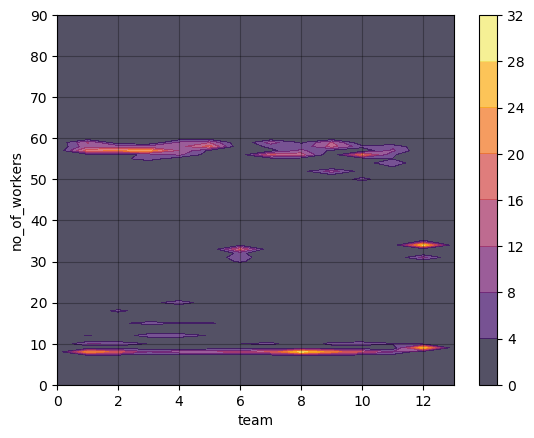

In [ ]:
plt.contourf(xs, ys, zs, alpha=0.7, cmap=plt.cm.inferno,)
plt.colorbar()
plt.xlabel(X)
plt.ylabel(Y)
plt.grid(c='k', ls='-', alpha=0.3)

Notice how all the bright areas on the contour plot have extremely high values (check  out the output of `pd.DataFrame(zs)` above for the exact numbers). This makes many of the other x-y coordinate points that have lower values for the productivity harder to see. It's as if our data was skewed! If only there was a trick to deal with skewed data...

Right, there is a way! Remember from last week we took the log of our target 'actual_productivity' to help alleviate its “skewedness”. Let's do the same thing again but now apply the log to `zs` our actual productivity!

## Transformation of Productivity Data

### Alleviating a heavy tailed distribution

Now, let us fix our skewed target data. Recall we are using the 'actual_productivity' column as our target (we stored this in `T` near the start of the lab). To fix the skew, recall we need to take the exponent of the 'actual_productivity' column.
   
    

<div id='TODO16'></div>

### TODO16 (5 points)

1. Take the exponent of the 'actual_productivity' column in the DataFrame `new_df` like we did in the pervious TODOs. Store the output into `exp_prod`.
    2. Hint: You can consider to use `numpy.exp` for it.

array([2.56183916, 2.4266216 , 2.22681094, ..., 1.86941398, 1.65845905,
       1.48397192])

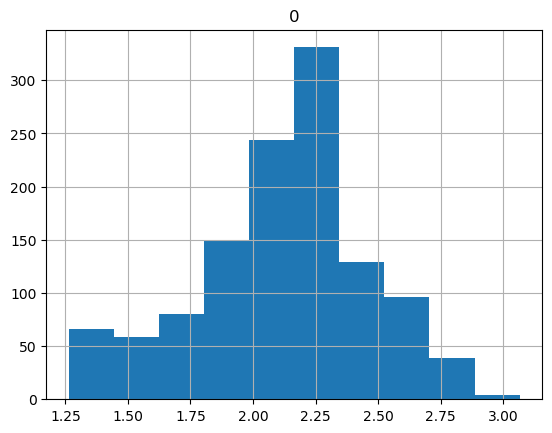

In [ ]:
# TODO 16.1

exp_prod

In [ ]:
todo_check([
    ("np.all(np.isclose(np.array(exp_prod)[1192:], np.array([1.87448383, 1.86941398, 1.86941398, 1.65845905, 1.48397192]))),",
     "exp_prod has incorrect values.")
])

Your code PASSED the code check!



## Indicator (Dummy/One-Hot) Variables

Now, we can practice one more useful trick, indicator variables. When we observe some categorical variables, sometimes scale is often not reasonable. For instance, let us assume we have the inputs of cat or dog.  Is it reasonable if we allocate 1 to cat and 2 to dog? Can we say that dog $>$ cat as 2 $>$ 1? No, we can't. For this reason, we convert the categorical values to indicator variables or one-hot encodings. Instead of 1 or 2 for cat or dog, we use binary representations. For instance, `[0, 1]` could be for cat and `[1, 0]` could be for dog.

If you need further reading, please take a look at [this article](https://www.educative.io/blog/one-hot-encoding).

Follow the code for how we can covert the string values into indicator variables using `pd.get_dummies()` function in Pandas.


<div id='TODO17'></div>

### TODO17-1 (3 points)

1. Refering to the lecture slides (using `get_dummies` in Pandas), convert the `quarter` column in the dataframe `new_df` to indicator variables. Store the output into `indicator_quarter`.

2. Refering to the lecture slides (using `get_dummies` in Pandas), convert the `day` column in the dataframe `new_df` to indicator variables. Store the output into `indicator_day`.

In [ ]:
new_df.loc[:,'quarter']

0       1
1       1
2       1
3       1
4       1
       ..
1192    2
1193    2
1194    2
1195    2
1196    2
Name: quarter, Length: 1197, dtype: int64

In [ ]:
# TODO 17-1.1

indicator_quarter

,1,2,3,4,5
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1192,0,1,0,0,0
1193,0,1,0,0,0
1194,0,1,0,0,0
1195,0,1,0,0,0


In [ ]:
todo_check([
    ("indicator_quarter.shape == (1197,5)", "indicator_quarter has wrong shape."),
     ("np.all(indicator_quarter.iloc[1].values == np.array([1,0,0,0,0], dtype=np.uint8))", "indicator_quarter has incorrect values.")
])

Your code PASSED the code check!


In [ ]:
# TODO 17-1.2

indicator_day

,1,2,3,4,5,7
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1192,0,0,0,1,0,0
1193,0,0,0,1,0,0
1194,0,0,0,1,0,0
1195,0,0,0,1,0,0


In [ ]:
todo_check([
    ("indicator_day.shape == (1197,6)", "indicator_day has wrong shape."),
    ("np.all(indicator_day.iloc[-1].values == np.array([0, 0, 0, 1, 0, 0], dtype=np.uint8))", "indicator_day has incorrect values.")
])

Your code PASSED the code check!


In [ ]:
# This will delete the variables defined in the above section to
# prevent conflicts in future sections.
garbage_collect(['indicator_day', 'indicator_quarter'])

<div id='TODO17-2'></div>

### TODO17-2 (2 points)
Now it's time to repeat the indicator variable conversion but now using the  `OneHotEncoder` class in Scikit-Learn.
1. To start, you will need to extract the unique values contained within the 'date', 'quarter', 'department', and 'day' columns of the dataframe `df`. Store the unqiue values into the respective variables  `unique_dates`, `unique_quarters`, `unique_depts` and `unique_days`.
    1. Hint: Try using Pandas `.unique()` method.
2. Now create a `OneHotEncoder` class instance using the list variables `unique_dates`, `unique_quarters`, `unique_depts` and `unique_days` as categories.
    1. Hint: See the documentation for `OneHotEncoder` to understand the 'categories' argument.
3. Convert the 'date', 'quarter', 'department', and 'day' columns in `df` into a one-hot encoding using your instance of the `OneHotEncoder` class. Convert the output into a DataFrame and store it into `indicator_md`.
    1. Hint: Try using the `fit()` and `transform()` methods or the `fit_transform()` method.
    1. Hint: Before converting to a DataFrame be sure to convert the output into a Numpy array using `toarray()` method.

In [ ]:
df[['date','quarter','department', 'day']]

,date,quarter,department,day
0,1/1/2015,Quarter1,sweing,Thursday
1,1/1/2015,Quarter1,finishing,Thursday
2,1/1/2015,Quarter1,sweing,Thursday
3,1/1/2015,Quarter1,sweing,Thursday
4,1/1/2015,Quarter1,sweing,Thursday
...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday
1193,3/11/2015,Quarter2,finishing,Wednesday
1194,3/11/2015,Quarter2,finishing,Wednesday
1195,3/11/2015,Quarter2,finishing,Wednesday


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# TODO 17-2.1

# TODO 17-2.2

# TODO 17-2.3


indicator_md

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
todo_check([
    ("isinstance(indicator_md, pd.DataFrame)", "indicator_md is not of type pd.DataFrame"),
    ("indicator_md.shape == (1197, 73)", "indicator_md has the wrong shape.")
])

Your code PASSED the code check!


We can slice all the other columns but 'date', 'quarter', 'department', and 'day' as below.

In [ ]:
display(df.iloc[:, 4:])

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Now, you can combine the all the features into one DataFrame.

In [ ]:
pd.concat([indicator_md, df.iloc[:, 4:]], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


<div id="TODO18"></div>

## Feedback (2 point)

Please take time to answer the following feedback qustions to help us further improve these labs! Your feedback is crucial to making these labs more useful!
    


* How do you rate the overall experience in this lab? (5 likert scale. i.e., 1 - poor ... 5 - amazing)  
Why do you think so? What was most/least useful?



`ANSWER`

* What did you find difficult about the lab? Were there any TODOs that were unclear? If so, what specfically did not make sense about it?



`ANSWER`

* Which concepts, if any, within the lab do you feel could use more explanation?

`ANSWER`